In [1]:
# default_exp datasource

In [83]:
# export
import pandas as pd
import numpy as np
import requests
from code.config import *
import json
import os
from datetime import datetime

In [62]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)  # 设置显示数据的最大列数，防止出现省略号…，导致数据显示不全
pd.set_option('expand_frame_repr', False)  # 当列太多时不自动换行
import matplotlib.pyplot as plt
%matplotlib inline
# 支持中文显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# stock_dict

## etf_dict

In [107]:
# export
etf_dict = {'大盘': 'sh000001',
 '上证50': 'sh510050',
 '沪深300': 'sh510300',
 '军工ETF': 'sh512660',
 '证券ETF': 'sh512880',
 '银行ETF': 'sh512800',
 '环保ETF': 'sh512580',
 '医药ETF': 'sh512010',
 '红利ETF': 'sh510880',
 '消费ETF': 'sh510150',
 '传媒ETF': 'sh512980',
 '科技ETF': 'sh515000',
 '半导体': 'sh512480',
 '信息技术ETF': 'sz159939',
 '通信ETF': 'sh515880',
#  '国债ETF': 'sz511010',
#  '黄金ETF': 'sh518880',
 '500ETF': 'sh510500',
 '创业板ETF': 'sz159915',}

stock_50_dict = {
 '浦发银行': 'sh.600000',
 '上海机场': 'sh.600009',
 '民生银行': 'sh.600016',
 '中国石化': 'sh.600028',
 '中信证券': 'sh.600030',
 '三一重工': 'sh.600031',
 '招商银行': 'sh.600036',
 '保利地产': 'sh.600048',
 '中国联通': 'sh.600050',
 '上汽集团': 'sh.600104',
 '复星医药': 'sh.600196',
 '恒瑞医药': 'sh.600276',
 '万华化学': 'sh.600309',
 '贵州茅台': 'sh.600519',
 '山东黄金': 'sh.600547',
 '海螺水泥': 'sh.600585',
 '用友网络': 'sh.600588',
 '海尔智家': 'sh.600690',
 '三安光电': 'sh.600703',
 '闻泰科技': 'sh.600745',
 '海通证券': 'sh.600837',
 '伊利股份': 'sh.600887',
 '隆基股份': 'sh.601012',
 '中信建投': 'sh.601066',
 '中国神华': 'sh.601088',
 '工业富联': 'sh.601138',
 '兴业银行': 'sh.601166',
 '中国铁建': 'sh.601186',
 '国泰君安': 'sh.601211',
 '红塔证券': 'sh.601236',
 '农业银行': 'sh.601288',
 '中国平安': 'sh.601318',
 '中国人保': 'sh.601319',
 '交通银行': 'sh.601328',
 '新华保险': 'sh.601336',
 '工商银行': 'sh.601398',
 '中国太保': 'sh.601601',
 '中国人寿': 'sh.601628',
 '邮储银行': 'sh.601658',
 '中国建筑': 'sh.601668',
 '华泰证券': 'sh.601688',
 '京沪高铁': 'sh.601816',
 '光大银行': 'sh.601818',
 '中国石油': 'sh.601857',
 '中国中免': 'sh.601888',
 '中国银行': 'sh.601988',
 '中国重工': 'sh.601989',
 '汇顶科技': 'sh.603160',
 '药明康德': 'sh.603259',
 '洛阳钼业': 'sh.603993'
}

stock_hs300_dict = {'浦发银行': 'sh.600000',
 '白云机场': 'sh.600004',
 '上海机场': 'sh.600009',
 '包钢股份': 'sh.600010',
 '华能国际': 'sh.600011',
 '华夏银行': 'sh.600015',
 '民生银行': 'sh.600016',
 '上港集团': 'sh.600018',
 '宝钢股份': 'sh.600019',
 '华能水电': 'sh.600025',
 '华电国际': 'sh.600027',
 '中国石化': 'sh.600028',
 '南方航空': 'sh.600029',
 '中信证券': 'sh.600030',
 '三一重工': 'sh.600031',
 '招商银行': 'sh.600036',
 '中直股份': 'sh.600038',
 '保利地产': 'sh.600048',
 '中国联通': 'sh.600050',
 '国投资本': 'sh.600061',
 '宇通客车': 'sh.600066',
 '葛洲坝': 'sh.600068',
 '同仁堂': 'sh.600085',
 '特变电工': 'sh.600089',
 '上汽集团': 'sh.600104',
 '国金证券': 'sh.600109',
 '北方稀土': 'sh.600111',
 '东方航空': 'sh.600115',
 '中国卫星': 'sh.600118',
 '上海建工': 'sh.600170',
 '中国巨石': 'sh.600176',
 '雅戈尔': 'sh.600177',
 '生益科技': 'sh.600183',
 '兖州煤业': 'sh.600188',
 '复星医药': 'sh.600196',
 '新湖中宝': 'sh.600208',
 '南山铝业': 'sh.600219',
 '海航控股': 'sh.600221',
 '圆通速递': 'sh.600233',
 '航天信息': 'sh.600271',
 '恒瑞医药': 'sh.600276',
 '广汇汽车': 'sh.600297',
 '安迪苏': 'sh.600299',
 '万华化学': 'sh.600309',
 '白云山': 'sh.600332',
 '华夏幸福': 'sh.600340',
 '恒力石化': 'sh.600346',
 '浙江龙盛': 'sh.600352',
 '江西铜业': 'sh.600362',
 '西南证券': 'sh.600369',
 '中航电子': 'sh.600372',
 '金地集团': 'sh.600383',
 '五矿资本': 'sh.600390',
 '海澜之家': 'sh.600398',
 '国电南瑞': 'sh.600406',
 '片仔癀': 'sh.600436',
 '通威股份': 'sh.600438',
 '中国动力': 'sh.600482',
 '亨通光电': 'sh.600487',
 '中金黄金': 'sh.600489',
 '烽火通信': 'sh.600498',
 '方大炭素': 'sh.600516',
 '贵州茅台': 'sh.600519',
 '中天科技': 'sh.600522',
 '山东黄金': 'sh.600547',
 '恒生电子': 'sh.600570',
 '海油工程': 'sh.600583',
 '海螺水泥': 'sh.600585',
 '用友网络': 'sh.600588',
 '绿地控股': 'sh.600606',
 '东方明珠': 'sh.600637',
 '豫园股份': 'sh.600655',
 '福耀玻璃': 'sh.600660',
 '川投能源': 'sh.600674',
 '海尔智家': 'sh.600690',
 '三安光电': 'sh.600703',
 '中航资本': 'sh.600705',
 '华域汽车': 'sh.600741',
 '闻泰科技': 'sh.600745',
 '中航沈飞': 'sh.600760',
 '国电电力': 'sh.600795',
 '山西汾酒': 'sh.600809',
 '海通证券': 'sh.600837',
 '上海临港': 'sh.600848',
 '通化东宝': 'sh.600867',
 '国投电力': 'sh.600886',
 '伊利股份': 'sh.600887',
 '航发动力': 'sh.600893',
 '长江电力': 'sh.600900',
 '江苏银行': 'sh.600919',
 '杭州银行': 'sh.600926',
 '西安银行': 'sh.600928',
 '东方证券': 'sh.600958',
 '海油发展': 'sh.600968',
 '中国电影': 'sh.600977',
 '宝丰能源': 'sh.600989',
 '九州通': 'sh.600998',
 '招商证券': 'sh.600999',
 '大秦铁路': 'sh.601006',
 '南京银行': 'sh.601009',
 '隆基股份': 'sh.601012',
 '宁波港': 'sh.601018',
 '春秋航空': 'sh.601021',
 '中信建投': 'sh.601066',
 '渝农商行': 'sh.601077',
 '中国神华': 'sh.601088',
 '恒立液压': 'sh.601100',
 '财通证券': 'sh.601108',
 '中国国航': 'sh.601111',
 '中国化学': 'sh.601117',
 '工业富联': 'sh.601138',
 '新城控股': 'sh.601155',
 '天风证券': 'sh.601162',
 '兴业银行': 'sh.601166',
 '北京银行': 'sh.601169',
 '中国铁建': 'sh.601186',
 '东兴证券': 'sh.601198',
 '国泰君安': 'sh.601211',
 '白银有色': 'sh.601212',
 '君正集团': 'sh.601216',
 '陕西煤业': 'sh.601225',
 '上海银行': 'sh.601229',
 '环旭电子': 'sh.601231',
 '红塔证券': 'sh.601236',
 '广汽集团': 'sh.601238',
 '农业银行': 'sh.601288',
 '青岛港': 'sh.601298',
 '中国平安': 'sh.601318',
 '中国人保': 'sh.601319',
 '交通银行': 'sh.601328',
 '新华保险': 'sh.601336',
 '三六零': 'sh.601360',
 '兴业证券': 'sh.601377',
 '中国中铁': 'sh.601390',
 '工商银行': 'sh.601398',
 '东吴证券': 'sh.601555',
 '长沙银行': 'sh.601577',
 '中国铝业': 'sh.601600',
 '中国太保': 'sh.601601',
 '上海医药': 'sh.601607',
 '中国中冶': 'sh.601618',
 '中国人寿': 'sh.601628',
 '长城汽车': 'sh.601633',
 '邮储银行': 'sh.601658',
 '中国建筑': 'sh.601668',
 '中国电建': 'sh.601669',
 '华泰证券': 'sh.601688',
 '中国卫通': 'sh.601698',
 '上海电气': 'sh.601727',
 '中国中车': 'sh.601766',
 '光大证券': 'sh.601788',
 '中国交建': 'sh.601800',
 '中海油服': 'sh.601808',
 '京沪高铁': 'sh.601816',
 '光大银行': 'sh.601818',
 '美凯龙': 'sh.601828',
 '成都银行': 'sh.601838',
 '中国石油': 'sh.601857',
 '正泰电器': 'sh.601877',
 '浙商证券': 'sh.601878',
 '中国银河': 'sh.601881',
 '中国中免': 'sh.601888',
 '中煤能源': 'sh.601898',
 '紫金矿业': 'sh.601899',
 '方正证券': 'sh.601901',
 '浙商银行': 'sh.601916',
 '中远海控': 'sh.601919',
 '永辉超市': 'sh.601933',
 '建设银行': 'sh.601939',
 '中国核电': 'sh.601985',
 '中国银行': 'sh.601988',
 '中国重工': 'sh.601989',
 '金隅集团': 'sh.601992',
 '贵阳银行': 'sh.601997',
 '中信银行': 'sh.601998',
 '中科曙光': 'sh.603019',
 '养元饮品': 'sh.603156',
 '汇顶科技': 'sh.603160',
 '药明康德': 'sh.603259',
 '合盛硅业': 'sh.603260',
 '海天味业': 'sh.603288',
 '今世缘': 'sh.603369',
 '韦尔股份': 'sh.603501',
 '安图生物': 'sh.603658',
 '华友钴业': 'sh.603799',
 '欧派家居': 'sh.603833',
 '晨光文具': 'sh.603899',
 '兆易创新': 'sh.603986',
 '洛阳钼业': 'sh.603993',
 '平安银行': 'sz.000001',
 '万科A': 'sz.000002',
 '中兴通讯': 'sz.000063',
 '中国长城': 'sz.000066',
 '华侨城A': 'sz.000069',
 'TCL科技': 'sz.000100',
 '中联重科': 'sz.000157',
 '申万宏源': 'sz.000166',
 '美的集团': 'sz.000333',
 '潍柴动力': 'sz.000338',
 '徐工机械': 'sz.000425',
 '云南白药': 'sz.000538',
 '泸州老窖': 'sz.000568',
 '古井贡酒': 'sz.000596',
 '长安汽车': 'sz.000625',
 '天茂集团': 'sz.000627',
 '格力电器': 'sz.000651',
 '金科股份': 'sz.000656',
 '长春高新': 'sz.000661',
 '阳光城': 'sz.000671',
 '恒逸石化': 'sz.000703',
 '中信特钢': 'sz.000708',
 '河钢股份': 'sz.000709',
 '美锦能源': 'sz.000723',
 '京东方A': 'sz.000725',
 '国元证券': 'sz.000728',
 '中航飞机': 'sz.000768',
 '广发证券': 'sz.000776',
 '长江证券': 'sz.000783',
 '北新建材': 'sz.000786',
 '五粮液': 'sz.000858',
 '顺鑫农业': 'sz.000860',
 '新希望': 'sz.000876',
 '双汇发展': 'sz.000895',
 '紫光股份': 'sz.000938',
 '中南建设': 'sz.000961',
 '华东医药': 'sz.000963',
 '浪潮信息': 'sz.000977',
 '招商蛇口': 'sz.001979',
 '新和成': 'sz.002001',
 '华兰生物': 'sz.002007',
 '大族激光': 'sz.002008',
 '苏宁易购': 'sz.002024',
 '分众传媒': 'sz.002027',
 '苏泊尔': 'sz.002032',
 '美年健康': 'sz.002044',
 '三花智控': 'sz.002050',
 '韵达股份': 'sz.002120',
 '中环股份': 'sz.002129',
 '宁波银行': 'sz.002142',
 '荣盛发展': 'sz.002146',
 '石基信息': 'sz.002153',
 '正邦科技': 'sz.002157',
 '中航光电': 'sz.002179',
 '金风科技': 'sz.002202',
 '科大讯飞': 'sz.002230',
 '大华股份': 'sz.002236',
 '歌尔股份': 'sz.002241',
 '上海莱士': 'sz.002252',
 '东方雨虹': 'sz.002271',
 '洋河股份': 'sz.002304',
 '海大集团': 'sz.002311',
 '顺丰控股': 'sz.002352',
 '北方华创': 'sz.002371',
 '广联达': 'sz.002410',
 '海康威视': 'sz.002415',
 '科伦药业': 'sz.002422',
 '欧菲光': 'sz.002456',
 '赣锋锂业': 'sz.002460',
 '沪电股份': 'sz.002463',
 '天齐锂业': 'sz.002466',
 '申通快递': 'sz.002468',
 '立讯精密': 'sz.002475',
 '荣盛石化': 'sz.002493',
 '老板电器': 'sz.002508',
 '三七互娱': 'sz.002555',
 '巨人网络': 'sz.002558',
 '比亚迪': 'sz.002594',
 '龙蟒佰利': 'sz.002601',
 '世纪华通': 'sz.002602',
 '中公教育': 'sz.002607',
 '完美世界': 'sz.002624',
 '西部证券': 'sz.002673',
 '牧原股份': 'sz.002714',
 '国信证券': 'sz.002736',
 '万达电影': 'sz.002739',
 '康弘药业': 'sz.002773',
 '视源股份': 'sz.002841',
 '深南电路': 'sz.002916',
 '鹏鼎控股': 'sz.002938',
 '长城证券': 'sz.002939',
 '华林证券': 'sz.002945',
 '青农商行': 'sz.002958',
 '中国广核': 'sz.003816',
 '乐普医疗': 'sz.300003',
 '亿纬锂能': 'sz.300014',
 '爱尔眼科': 'sz.300015',
 '同花顺': 'sz.300033',
 '东方财富': 'sz.300059',
 '智飞生物': 'sz.300122',
 '汇川技术': 'sz.300124',
 '信维通信': 'sz.300136',
 '沃森生物': 'sz.300142',
 '宋城演艺': 'sz.300144',
 '泰格医药': 'sz.300347',
 '三环集团': 'sz.300408',
 '芒果超媒': 'sz.300413',
 '蓝思科技': 'sz.300433',
 '温氏股份': 'sz.300498',
 '康泰生物': 'sz.300601',
 '亿联网络': 'sz.300628'}

In [89]:
# export
class DataSource(object):
    def __init__(self, code, startDate=None, endDate=None, dataLen=None, verbose=True, plot=False, keepRowData=False):
        """

        :keepRowData: bool. 是否保留self._rawData
        """
        if code in etf_dict:
            code = etf_dict[code]
        self._rawData = self.fetch(
            code, startDate, endDate, dataLen, verbose)  # 直接得到的未经处理原始数据
        if keepRowData:
            data = self._rawData.copy()
        else:
            data = self._rawData
        self.data = self.transform(data)  # 标准数据

    def fetch(self, code, startDate=None, endDate=None, dataLen=None):
        """
        从数据源获取数据，需要子类重新实现
        """
        return pd.DataFrame()

#     def transform(self, raw_data):
#         """
#         把fetch到的原始数据转换为标准数据，需要子类重新实现
#         """
#         return pd.DataFrame()
    def transform(self, raw_data):
        """
        把fetch到的原始数据转换为标准数据，需要子类重新实现
        """
        _tmp = raw_data
        _tmp['t'] = _tmp.close.shift(1)
        _tmp['close_pct'] =(_tmp.close / _tmp.t - 1).map(lambda x: round(x, 3), na_action='ignore')
        _tmp['close_pct_log'] =(_tmp.close / _tmp.t).map(lambda x: round(np.log(x), 3), na_action='ignore')
        
        # 振幅
        _tmp['swing'] = ((_tmp.high - _tmp.low) / _tmp.t).map(lambda x: round(x, 3), na_action='ignore')
        _tmp.loc[_tmp.close_pct < 0, 'swing'] =  _tmp.loc[_tmp.close_pct < 0, 'swing'] * (-1)
        
        _tmp['t'] = _tmp.volume.shift(1)
        _tmp['volume_pct'] =(_tmp.volume / _tmp.t - 1).map(lambda x: round(x, 3), na_action='ignore')
        _tmp['volume_pct_log'] =(_tmp.volume / _tmp.t).map(lambda x: round(np.log(x), 3), na_action='ignore')
        
        def new_high(s):
            return int(s.iloc[-1]>=s.iloc[:-1].max())
        def new_low(s):
            return int(s.iloc[-1]<=s.iloc[:-1].min())
        for d in [
#             3, 
#             5, 
#             10, 
            20, 60, 120]:
            for c in 'close volume'.split():
                # 均线
                _tmp[f'{c}_ma{d}'] = _tmp[c].rolling(d).mean()
                # 当前值偏离均值的程度
                _tmp[f'{c}_ma{d}_diff_pct'] = ((_tmp[c] - _tmp[f'{c}_ma{d}'])/_tmp[f'{c}_ma{d}']).map(lambda x: round(x, 3), na_action='ignore')
                # 均值的斜率
                _tmp['t1'] = _tmp[f'{c}_ma{d}'].shift(1)
                _tmp['t2'] = _tmp[f'{c}_ma{d}'].shift(2)
                _tmp['t3'] = _tmp[f'{c}_ma{d}'].shift(2)
                _tmp[f'{c}_ma{d}_grad1'] = _tmp[f'{c}_ma{d}']/_tmp['t1']
                _tmp[f'{c}_ma{d}_grad2'] = _tmp[f'{c}_ma{d}']/((_tmp['t2']+_tmp['t3'])/2)
                _tmp[f'{c}_ma{d}_grad12_diff'] = _tmp[f'{c}_ma{d}_grad1'] - _tmp[f'{c}_ma{d}_grad2']
                
                # 累计涨幅
                _tmp[f'{c}_pct_log_sum{d}'] = _tmp[f'{c}_pct_log'].rolling(d).sum()
                del _tmp[f'{c}_ma{d}']
            # high > 近n日高点 or low 跌破 近 n日低点
            _tmp[f'high_new_{d}'] = _tmp[f'high'].rolling(d).agg(new_high)
            _tmp[f'low_new_{d}'] = _tmp[f'low'].rolling(d).agg(new_low)
            
            _tmp[f'close_high_new_{d}'] = _tmp[f'close'].rolling(d).agg(new_high)
            _tmp[f'close_low_new_{d}'] = _tmp[f'close'].rolling(d).agg(new_low)
            
            # 平均振幅
            _tmp[f'swing_ma{d}'] = _tmp['swing'].rolling(d).mean()
                
        del _tmp['t'], _tmp['t1'], _tmp['t2'], _tmp['t3']
        return _tmp

## SinaDataSource

In [91]:
# export
class SinaDataSource(DataSource):
    def fetch(self, code, startDate=None, endDate=None, dataLen=None, verbose=False, plot=False):
        
        return get_hist_k_data(code, startDate, endDate, dataLen, verbose, plot)

### get_hist_k_data(code, datalen)
获取最近datalen天的code的行情数据

In [25]:
(pd.to_datetime('2020-11-10') - pd.to_datetime('20001010')).days

7336

In [26]:
(datetime.now() - pd.to_datetime('20001010')).days

7221

In [39]:
(datetime.now() - pd.to_datetime('20001010'))

Timedelta('7221 days 07:54:32.166605')

In [52]:
end_date = pd.to_datetime('20001010')

In [54]:
end_date.strftime('%Y%m%d')

'20001010'

In [92]:
# export
def get_hist_k_data(code, start_date=None, end_date=None, datalen=None, verbose=False, plot=False):
    """
    
    """
    if end_date:
        end_date = pd.to_datetime(end_date)
    else:
        end_date = datetime.now()
    if start_date:
        datalen = (end_date - pd.to_datetime(start_date)).days
        print(datalen)
    if datalen is None: 
        return None
    print(f'code:{code}, start_date: {start_date}, end_date: {end_date.strftime("%Y%m%d")}, datalen: {datalen}')
    r = requests.get('http://money.finance.sina.com.cn/quotes_service/api/json_v2.php/'
                     +'CN_MarketData.getKLineData?symbol={}&scale=240&ma=no&datalen={}'.format(code, datalen))
    rs = r.text
    cols_num = ['open', 'high', 'low', 'close', 'volume']
    cols = ['day'] + cols_num
    df1 = pd.DataFrame(json.loads(rs))
    df1.loc[:, cols_num] = df1.loc[:, cols_num].applymap(float)
    df1.loc[:, 'day'] = pd.to_datetime(df1.day)
    df1 = df1[(start_date<=df1.day)&(df1.day<=end_date)]
    df1.set_index('day', inplace=True)
    if verbose:
        print(df1.head(2))
        print(df1.tail(2))
    if plot:
        df1.close.plot()
        
    return df1

870
               open     high      low    close       volume
day                                                        
2018-03-01  3235.09  3280.15  3228.59  3273.76  15909832000
2018-03-02  3248.45  3269.94  3242.27  3254.53  15086106300
               open     high      low    close       volume
day                                                        
2020-07-16  3356.36  3373.53  3209.73   3210.1  49061312300
2020-07-17   3214.4  3252.78  3181.28  3214.13  35965241300


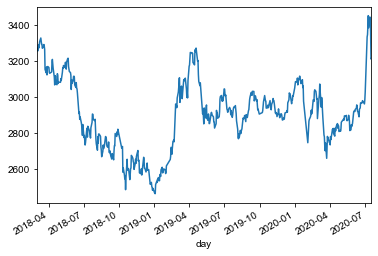

In [49]:
df = get_hist_k_data(stock_dict['大盘'], start_date='20180301', verbose=True, plot=True)

870
            open   high    low  close     volume
day                                             
2018-03-01     4  4.067  3.993  4.049  118636949
2018-03-02  4.02  4.043  4.008  4.022   90614682
            open   high    low  close      volume
day                                              
2020-07-16  4.79  4.828   4.55  4.556  1289918063
2020-07-17  4.57  4.654  4.541  4.605   904292349


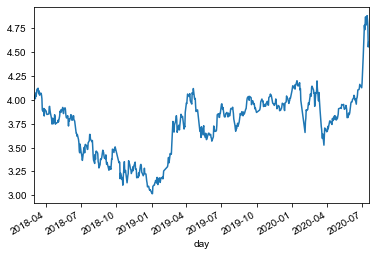

In [47]:
df = get_hist_k_data('sh510300', start_date='20180301', verbose=True, plot=True)

## ZqbDataSource

In [94]:
# export
class ZqbDataSource(DataSource):
    def fetch(self, code, startDate=None, endDate=None, dataLen=None, verbose=False, plot=False):
        import baostock as bs
        # 登陆系统
        lg = bs.login()
        # 显示登陆返回信息
#         print('login respond error_code:'+lg.error_code)
#         print('login respond  error_msg:'+lg.error_msg)
        # 详细指标参数，参见“历史行情指标参数”章节
        if code in stock_50_dict:
            code = stock_50_dict[code]
        elif code in stock_hs300_dict:
            code = stock_hs300_dict[code]
        rs = bs.query_history_k_data_plus(code,
            "date,open,high,low,close,volume",
            start_date=startDate,
                                      end_date=endDate, 
                                          frequency="d",
                                         adjustflag='2'
                                         )
        # 打印结果集
        data_list = []
        while (rs.error_code == '0') & rs.next():
            # 获取一条记录，将记录合并在一起
            data_list.append(rs.get_row_data())
        df1 = pd.DataFrame(data_list, columns=rs.fields)
        df1.columns = "day,open,high,low,close,volume".split(',')
        cols_num = ['open', 'high', 'low', 'close', 'volume']
        df1.loc[:, cols_num] = df1.loc[:, cols_num].applymap(float)
        df1 = df1[df1.volume>1]  # zqb取数会把交易日 但是stock停牌等情况的情况下 vol=0
        df1.loc[:, 'day'] = pd.to_datetime(df1.day)
        df1 = df1.set_index('day')
        if verbose:
            print(df1.head(2))
            print(df1.tail(2))
        if plot:
            df1.close.plot()
        return df1


In [95]:
zqb = ZqbDataSource('浦发银行', 
    startDate='2010-01-01', verbose=True, plot=True)

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  6.28669  6.29821  6.09374  6.10238  6.61913e+07
2010-01-05  6.16574  6.21469  5.98719  6.14846  1.15148e+08
             open   high    low  close       volume
day                                                
2020-07-23  10.99  10.99  10.61  10.84  8.68069e+07
2020-07-24  10.78   10.8   10.4  10.42  7.28864e+07


# zqb
https://zhuanlan.zhihu.com/p/54299970

http://baostock.com/baostock/index.php/%E9%A6%96%E9%A1%B5

In [796]:
# !pip install baostock

     |████████████████████████████████| 61kB 399kB/s eta 0:00:01


In [47]:
import baostock as bs
# 登陆系统
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

login success!
login respond error_code:0
login respond  error_msg:success


In [48]:
# 详细指标参数，参见“历史行情指标参数”章节
rs = bs.query_history_k_data_plus("sh.600660",
#     "date,code,open,high,low,close,preclose,volume,amount,pctChg",
            "date,open,high,low,close,volume",
    start_date='2010-01-01',
#                               end_date='2017-06-30', 
                                  frequency="d",
                                 adjustflag='2'
                                 )
print('query_history_k_data_plus respond error_code:'+rs.error_code)
print('query_history_k_data_plus respond  error_msg:'+rs.error_msg)

query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success


In [49]:
rs

In [50]:
# 打印结果集
data_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)

In [51]:
result.dtypes

date      object
open      object
high      object
low       object
close     object
volume    object
dtype: object

In [53]:
result.volume.map(float).describe()

count    2.566000e+03
mean     1.536948e+07
std      1.261536e+07
min      0.000000e+00
25%      7.640526e+06
50%      1.148941e+07
75%      1.843124e+07
max      1.102810e+08
Name: volume, dtype: float64

In [56]:
result[result.volume.map(float)<1]

,date,open,high,low,close,volume
407,2011-09-05,6.1047745000,6.1047745000,6.1047745000,6.1047745000,0
513,2012-02-17,5.8105685000,5.8105685000,5.8105685000,5.8105685000,0
572,2012-05-17,5.8373145000,5.8373145000,5.8373145000,5.8373145000,0


In [57]:
result.loc[407]

date        2011-09-05
open      6.1047745000
high      6.1047745000
low       6.1047745000
close     6.1047745000
volume               0
Name: 407, dtype: object

In [54]:
result.head(20)

,date,open,high,low,close,volume
0,2010-01-04,9.4503750000,9.5133775000,9.2739680000,9.3054692500,16724424
1,2010-01-05,9.3054692500,9.3810722500,8.9589555000,9.1038612500,35346968
2,2010-01-06,9.1038612500,9.1983650000,8.9337545000,9.0534592500,44608991
3,2010-01-07,9.0093575000,9.0408587500,8.5557395000,8.6187420000,46724393
4,2010-01-08,8.5683400000,8.5683400000,8.2848287500,8.4927370000,33071743
5,2010-01-11,8.5872407500,8.6817445000,8.1903250000,8.3100297500,38053995
6,2010-01-12,8.3667320000,8.7573475000,8.3163300000,8.7447470000,37403294
7,2010-01-13,8.5053375000,8.6943450000,8.3667320000,8.4297345000,37135640
8,2010-01-14,8.5116377500,8.7951490000,8.4423350000,8.7510472500,45714976
9,2010-01-15,8.7951490000,8.9904567500,8.7636477500,8.9085535000,35303588


In [24]:
result.tail()

,date,code,open,high,low,close,preclose,volume,amount,pctChg
2561,2020-07-20,sh.600660,23.7932730000,25.3082732400,23.3271190800,25.1431770600,23.3271190800,63556348,1611643758.0000,7.785200
2562,2020-07-21,sh.600660,24.9489462600,26.4930811200,24.8615424000,25.3762540200,25.1431770600,50403953,1329708295.6000,0.927000
2563,2020-07-22,sh.600660,25.4442348000,25.7355810000,24.9683693400,25.2500040000,25.3762540200,35886613,936983046.2200,-0.497500
2564,2020-07-23,sh.600660,24.8800000000,24.8800000000,24.0000000000,24.5800000000,25.2500000000,34034353,831366119.6300,-2.653500
2565,2020-07-24,sh.600660,24.5000000000,24.5000000000,23.0300000000,23.3200000000,24.5800000000,34059031,807187050.5700,-5.126100


## 上证50成分股

In [75]:
# 登陆系统
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

# 获取上证50成分股
rs = bs.query_sz50_stocks()
print('query_sz50 error_code:'+rs.error_code)
print('query_sz50  error_msg:'+rs.error_msg)

# 打印结果集
sz50_stocks = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    sz50_stocks.append(rs.get_row_data())
result = pd.DataFrame(sz50_stocks, columns=rs.fields)

login success!
login respond error_code:0
login respond  error_msg:success
query_sz50 error_code:0
query_sz50  error_msg:success


In [66]:
result.shape

(50, 3)

In [69]:
result.head()

,updateDate,code,code_name
0,2020-07-20,sh.600000,浦发银行
1,2020-07-20,sh.600009,上海机场
2,2020-07-20,sh.600016,民生银行
3,2020-07-20,sh.600028,中国石化
4,2020-07-20,sh.600030,中信证券


In [71]:
t = dict(zip(result.code_name.tolist(), result.code.tolist()))

## hs300

In [76]:
import baostock as bs
import pandas as pd

# 登陆系统
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

# 获取沪深300成分股
rs = bs.query_hs300_stocks()
print('query_hs300 error_code:'+rs.error_code)
print('query_hs300  error_msg:'+rs.error_msg)

# 打印结果集
hs300_stocks = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    hs300_stocks.append(rs.get_row_data())
result = pd.DataFrame(hs300_stocks, columns=rs.fields)

login success!
login respond error_code:0
login respond  error_msg:success
query_hs300 error_code:0
query_hs300  error_msg:success


In [78]:
result.shape

(300, 3)

In [77]:
result.head()

,updateDate,code,code_name
0,2020-07-20,sh.600000,浦发银行
1,2020-07-20,sh.600004,白云机场
2,2020-07-20,sh.600009,上海机场
3,2020-07-20,sh.600010,包钢股份
4,2020-07-20,sh.600011,华能国际


In [79]:
stock_hs300_dict = dict(zip(result.code_name.tolist(), result.code.tolist()))

# update_all_ds

In [99]:
from datetime import datetime
from tqdm import tqdm


In [85]:
datetime.strftime(datetime.now(), '%Y%m%d')

'20200727'

In [86]:
!mkdir {os.path.join(args.DATA_DIR, f'data')}

In [111]:
def update_all_ds():
    data_dir = os.path.join(args.DATA_DIR, f'data/{datetime.strftime(datetime.now(), "%Y%m%d")}')
    cnt = 0                        
    targets = []             
    df = pd.DataFrame()                        
    if not os.path.exists(data_dir):
        os.mkdir(data_dir)
        for k in tqdm(etf_dict.keys()):
            ds = SinaDataSource(
                    k, 
                    '20100101')
            ds.data.to_pickle(f'{os.path.join(data_dir, k)}.pkl')
            cnt += 1 
            targets.append(k) 
            df = df.append(ds.data.iloc[-1])                
#             break
        for k in tqdm(list(set(list(stock_50_dict.keys())+list(stock_hs300_dict.keys())))):
            ds = ZqbDataSource(k, 
                startDate='2010-01-01',)  
            ds.data.to_pickle(f'{os.path.join(data_dir, k)}.pkl')
            cnt += 1
            targets.append(k) 
            df = df.append(ds.data.iloc[-1])      
#             break             
    df['targets'] = targets                       
    print(f'update complete!!!{cnt}')
    return df                        

In [112]:
%%time

df = update_all_ds()




  0%|          | 0/17 [00:00<?, ?it/s]

3860
code:sh000001, start_date: 20100101, end_date: 20200727, datalen: 3860
               open     high      low    close       volume
day                                                        
2010-01-04  3289.75  3295.28  3243.32  3243.76  1.09448e+10
2010-01-05  3254.47  3290.51  3221.46  3282.18  1.26115e+10
               open     high      low    close       volume
day                                                        
2020-07-24  3310.64  3319.13  3184.97  3196.77  4.27054e+10
2020-07-27  3210.39  3221.99  3174.66  3205.23  2.99319e+10





  6%|▌         | 1/17 [00:07<02:03,  7.69s/it]

3860
code:sh510050, start_date: 20100101, end_date: 20200727, datalen: 3860
             open   high    low  close       volume
day                                                
2010-01-04  2.569  2.572   2.51  2.512  7.86433e+08
2010-01-05  2.525  2.562  2.489  2.544  1.09988e+09
             open   high    low  close       volume
day                                                
2020-07-24  3.318  3.319  3.181    3.2  7.69537e+08
2020-07-27  3.218  3.245  3.186  3.211  4.21672e+08





 12%|█▏        | 2/17 [00:15<01:55,  7.67s/it]

3860
code:sh510300, start_date: 20100101, end_date: 20200727, datalen: 3860
             open   high    low  close       volume
day                                                
2012-05-28  2.551  2.607  2.544  2.604  1.27752e+09
2012-05-29  2.602  2.661  2.602  2.644  7.14949e+08
             open   high    low  close       volume
day                                                
2020-07-24  4.726  4.742  4.527  4.554  6.48282e+08
2020-07-27  4.583  4.616  4.537  4.582  3.11101e+08





 18%|█▊        | 3/17 [00:21<01:39,  7.13s/it]

3860
code:sh512660, start_date: 20100101, end_date: 20200727, datalen: 3860
             open   high    low  close       volume
day                                                
2016-08-08  0.987   1.02  0.977  1.017  2.30006e+08
2016-08-09  1.012  1.017   1.01  1.016   4.7488e+07
             open   high    low  close       volume
day                                                
2020-07-24   1.12  1.131  1.067   1.07   2.2474e+09
2020-07-27  1.058  1.091  1.032  1.061  1.23937e+09





 24%|██▎       | 4/17 [00:24<01:16,  5.91s/it]

3860
code:sh512880, start_date: 20100101, end_date: 20200727, datalen: 3860
             open   high    low  close       volume
day                                                
2016-08-08  0.995  1.006  0.988  1.004  1.53492e+08
2016-08-09  1.002  1.016  1.002  1.012  4.56561e+07
             open   high    low  close       volume
day                                                
2020-07-24  1.256  1.267  1.175  1.191  3.05183e+09
2020-07-27  1.193  1.201  1.163  1.188  1.76486e+09





 29%|██▉       | 5/17 [00:29<01:06,  5.57s/it]

3860
code:sh512800, start_date: 20100101, end_date: 20200727, datalen: 3860
             open   high    low  close       volume
day                                                
2017-08-03  1.015  1.022  0.999  0.999  2.52815e+08
2017-08-04      1  1.005  0.997  0.999  1.29093e+07
             open   high    low  close       volume
day                                                
2020-07-24  1.056  1.061  1.031  1.039  5.82879e+08
2020-07-27  1.039  1.042  1.023   1.03  4.13153e+08





 35%|███▌      | 6/17 [00:31<00:49,  4.55s/it]

3860
code:sh512580, start_date: 20100101, end_date: 20200727, datalen: 3860
             open  high    low  close       volume
day                                               
2017-02-28  1.006  1.01  1.004  1.008  3.80984e+08
2017-03-01  1.008  1.01  1.006  1.008  5.95371e+07
             open   high    low  close       volume
day                                                
2020-07-24  0.968  0.972   0.92  0.925  2.31076e+07
2020-07-27  0.922  0.935  0.919   0.93  1.08636e+07





 41%|████      | 7/17 [00:33<00:39,  3.93s/it]

3860
code:sh512010, start_date: 20100101, end_date: 20200727, datalen: 3860
             open   high    low  close       volume
day                                                
2015-08-04   1.28  1.347  1.268  1.345  1.55741e+06
2015-08-05  1.345   1.39  1.301  1.331  2.18461e+06
             open   high    low  close       volume
day                                                
2020-07-24  2.912  2.912  2.753  2.782  7.87583e+07
2020-07-27  2.793  2.856  2.793  2.841  6.27344e+07





 47%|████▋     | 8/17 [00:37<00:34,  3.86s/it]

3860
code:sh510880, start_date: 20100101, end_date: 20200727, datalen: 3860
             open   high    low  close       volume
day                                                
2010-01-04  2.822  2.832  2.775  2.777   5.3165e+07
2010-01-05   2.78  2.822  2.755  2.813  6.81409e+07
             open   high    low  close       volume
day                                                
2020-07-24  2.702  2.703  2.608  2.625  3.02622e+07
2020-07-27  2.625   2.64  2.597  2.612  1.76522e+07





 53%|█████▎    | 9/17 [00:44<00:39,  4.93s/it]

3860
code:sh510150, start_date: 20100101, end_date: 20200727, datalen: 3860
             open   high   low  close       volume
day                                               
2011-02-25  3.073   3.09  3.05  3.076  7.73045e+07
2011-02-28   3.04  3.116  3.04  3.113  1.60747e+07
             open   high    low  close       volume
day                                                
2020-07-24  8.219  8.219   7.78   7.88  1.13441e+07
2020-07-27  7.769  7.958  7.769  7.889   3.5329e+06





 59%|█████▉    | 10/17 [00:51<00:38,  5.53s/it]

3860
code:sh512980, start_date: 20100101, end_date: 20200727, datalen: 3860
             open   high    low  close       volume
day                                                
2018-01-19  1.001  1.005  0.997  1.001  1.24215e+08
2018-01-22  1.001  1.034  0.995  1.023  4.86046e+07
             open   high    low  close       volume
day                                                
2020-07-24  1.011  1.013  0.952  0.963  6.74108e+07
2020-07-27  0.958  0.975  0.951   0.96  2.36179e+07





 65%|██████▍   | 11/17 [00:53<00:26,  4.45s/it]

3860
code:sh515000, start_date: 20100101, end_date: 20200727, datalen: 3860
             open   high    low  close       volume
day                                                
2019-08-16  1.022  1.047  1.019  1.037  5.33227e+08
2019-08-19  1.047  1.086  1.047  1.085  6.78505e+08
             open   high    low  close       volume
day                                                
2020-07-24  1.795  1.807  1.706  1.719  3.86427e+08
2020-07-27  1.722  1.759   1.72  1.739  2.23569e+08





 71%|███████   | 12/17 [00:54<00:16,  3.32s/it]

3860
code:sh512480, start_date: 20100101, end_date: 20200727, datalen: 3860
             open   high    low  close       volume
day                                                
2019-06-12  0.994  1.022   0.99  1.013  1.34632e+08
2019-06-13   1.01  1.016  0.994  0.999  1.50306e+07
             open   high    low  close       volume
day                                                
2020-07-24  2.278   2.32  2.163  2.171  1.66925e+08
2020-07-27  2.177  2.238  2.167  2.195  1.13769e+08





 76%|███████▋  | 13/17 [00:55<00:10,  2.57s/it]

3860
code:sz159939, start_date: 20100101, end_date: 20200727, datalen: 3860
             open   high    low  close       volume
day                                                
2015-02-05  0.993  1.036  0.993  1.012  7.89274e+07
2015-02-06   1.01  1.028  0.966  0.986   1.7923e+07
             open   high    low  close       volume
day                                                
2020-07-24  1.524   1.53  1.437  1.444   3.5428e+07
2020-07-27  1.448  1.471  1.436  1.452  2.12693e+07





 82%|████████▏ | 14/17 [00:59<00:08,  2.98s/it]

3860
code:sh515880, start_date: 20100101, end_date: 20200727, datalen: 3860
             open   high    low  close       volume
day                                                
2019-09-06   1.05   1.08  1.033  1.053  4.85995e+08
2019-09-09  1.069  1.133  1.057  1.123  4.61415e+08
             open   high    low  close       volume
day                                                
2020-07-24  1.232  1.247  1.181  1.185  1.15570e+08
2020-07-27  1.187  1.197   1.17  1.186  5.59485e+07





 88%|████████▊ | 15/17 [00:59<00:04,  2.26s/it]

3860
code:sh510500, start_date: 20100101, end_date: 20200727, datalen: 3860
             open   high    low  close       volume
day                                                
2013-03-15  0.967  0.985  0.955   0.97  3.25927e+08
2013-03-18  0.955  0.972  0.953  0.954  9.36962e+07
             open   high    low  close       volume
day                                                
2020-07-24  7.231  7.239  6.881  6.909  2.99099e+08
2020-07-27   6.92  6.964  6.841  6.905  2.11284e+08





 94%|█████████▍| 16/17 [01:04<00:03,  3.15s/it]

3860
code:sz159915, start_date: 20100101, end_date: 20200727, datalen: 3860
             open   high    low  close       volume
day                                                
2011-12-09  0.795  0.814  0.795  0.797  1.06177e+08
2011-12-12   0.79  0.803   0.79   0.79  3.11065e+07
             open   high    low  close       volume
day                                                
2020-07-24   2.68  2.695  2.525  2.537   8.1784e+08
2020-07-27  2.544  2.577  2.513   2.54  4.23595e+08





100%|██████████| 17/17 [01:11<00:00,  4.19s/it]



  0%|          | 0/300 [00:00<?, ?it/s]

login success!
               open     high      low    close       volume
day                                                        
2010-01-07  4.98248  5.06898  4.88733  4.97383  5.70082e+08
2010-01-08  4.84408  4.85273  4.75758  4.82678   2.4408e+08
            open  high   low close       volume
day                                            
2020-07-24  5.89  5.98  5.73  5.73  3.91745e+07
2020-07-27  5.75  5.78  5.65  5.71  2.46332e+07





  0%|          | 1/300 [00:07<36:23,  7.30s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  14.6829  14.9499  14.5399  14.6543  2.66576e+07
2010-01-05  14.6638  14.8355  14.3778  14.6829  3.00754e+07
             open   high    low  close       volume
day                                                
2020-07-24  23.51  24.49  22.88  23.08    8.893e+07
2020-07-27  22.98  23.29  22.05  22.38  4.79092e+07





  1%|          | 2/300 [00:14<36:28,  7.35s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  7.60557  7.67804  7.49685  7.57839  3.15688e+06
2010-01-05   7.6101   7.6101  7.40626  7.54215  2.82583e+06
             open  high    low  close       volume
day                                               
2020-07-24  15.72  15.9  14.91  15.08  1.91781e+07
2020-07-27  15.04  15.6  14.91   15.5  1.21869e+07





  1%|          | 3/300 [00:22<36:16,  7.33s/it]

login success!
               open     high      low    close  volume
day                                                   
2019-03-01  5.32563  6.38697  5.32563  6.38697  441427
2019-03-04  7.02187  7.02187  7.02187  7.02187  465168
            open  high   low close       volume
day                                            
2020-07-24  5.77  5.82  5.52  5.57  1.89654e+07
2020-07-27  5.59  5.63   5.5  5.55  9.53897e+06





  1%|▏         | 4/300 [00:22<26:41,  5.41s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  4.33977  4.36965   4.3099  4.32483   1.8708e+07
2010-01-05  4.32483  4.34724  4.24267   4.3323  2.06794e+07
            open  high   low close       volume
day                                            
2020-07-24   4.5  4.54  4.37  4.41  4.30544e+07
2020-07-27  4.43  4.45  4.38  4.41    2.134e+07





  2%|▏         | 5/300 [00:30<29:23,  5.98s/it]

login success!
               open     high      low    close       volume
day                                                        
2012-05-03  5.75988  5.84751  5.37748  5.77581  1.12449e+08
2012-05-04  5.98295  6.32153   5.8515  5.88336  1.17092e+08
             open   high   low close       volume
day                                              
2020-07-24  10.26  10.45  9.67  9.74  7.86581e+07
2020-07-27   9.79   9.85  9.46  9.73  4.52813e+07





  2%|▏         | 6/300 [00:36<29:01,  5.92s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  5.56308   5.5768  5.48076  5.49448   1.3472e+07
2010-01-05   5.5082  5.54936  5.41903  5.54936  1.20014e+07
            open  high   low close       volume
day                                            
2020-07-24  4.76  4.78  4.58  4.66  3.67984e+07
2020-07-27  4.64  4.76  4.61  4.75   2.8706e+07





  2%|▏         | 7/300 [00:43<31:11,  6.39s/it]

login success!
               open     high      low    close       volume
day                                                        
2011-07-15  10.2035  11.5997  9.98866  11.0283  1.75805e+07
2011-07-18  11.1701  12.0057  10.8479  11.2775  8.68128e+06
             open   high    low  close       volume
day                                                
2020-07-24   24.7  24.72  22.43  22.43  5.91306e+07
2020-07-27  22.75  22.76  21.33  22.75  4.40082e+07





  3%|▎         | 8/300 [00:49<30:24,  6.25s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  1.40779  1.42609  1.37828  1.37946  2.63061e+06
2010-01-05  1.37238  1.39127   1.3163  1.32634  3.26272e+06
            open  high   low close       volume
day                                            
2020-07-24  7.07  7.16  6.87  6.97   3.3835e+07
2020-07-27  6.99     7  6.76  6.85  2.64134e+07





  3%|▎         | 9/300 [00:57<32:34,  6.72s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  1.21199  1.24162  1.20851   1.2268  1.85181e+06
2010-01-05  1.21983  1.23552  1.19021  1.21548  2.13605e+06
             open   high    low  close       volume
day                                                
2020-07-24   18.2  18.51  17.71  17.84  2.31533e+07
2020-07-27  17.83  17.98  17.38  17.44   1.6531e+07





  3%|▎         | 10/300 [01:04<33:08,  6.86s/it]

login success!
               open     high      low    close  volume
day                                                   
2017-01-23  7.78751  9.35074  7.78751  9.35074  460605
2017-01-24  10.2849  10.2849  10.2849  10.2849  543559
             open   high    low  close       volume
day                                                
2020-07-24   13.5  13.67  12.58  12.75  8.92084e+07
2020-07-27  12.86  13.06  12.58  12.91  5.73183e+07





  4%|▎         | 11/300 [01:07<27:08,  5.64s/it]

login success!
               open     high      low    close  volume
day                                                   
2014-07-03  7.56701  9.07892  7.56701  9.07892  395652
2014-07-04  9.98755  9.98755  9.98755  9.98755  291839
             open   high    low  close       volume
day                                                
2020-07-24  44.15  44.15  41.14   41.9  1.06321e+07
2020-07-27  41.95  42.89  41.49  41.95  1.23489e+07





  4%|▍         | 12/300 [01:11<25:14,  5.26s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  8.61173  8.63825  8.38185  8.39069  4.05223e+07
2010-01-05  8.39069   8.6913  8.35532  8.68246  4.41076e+07
            open  high   low close       volume
day                                            
2020-07-24  7.18  7.23  6.95  6.96  5.74155e+07
2020-07-27  6.96     7  6.83  6.89  3.44514e+07





  4%|▍         | 13/300 [01:18<27:48,  5.81s/it]

login success!
               open     high      low    close  volume
day                                                   
2019-03-26  4.50413  5.40496  4.50413  5.40496  623417
2019-03-27  5.94545  5.94545  5.94545  5.94545  295773
            open  high   low close       volume
day                                            
2020-07-24  5.98  6.08  5.51  5.56  1.43976e+08
2020-07-27  5.61  5.67  5.37   5.5  7.64255e+07





  5%|▍         | 14/300 [01:19<20:49,  4.37s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  6.60053  6.61915  6.42831  6.43296   8.4226e+07
2010-01-05  6.44227  6.54002  6.29797   6.4702  1.10018e+08
            open  high   low close       volume
day                                            
2020-07-24  4.06  4.09  3.99     4  1.92382e+08
2020-07-27  4.01  4.03  3.99  4.01  1.23328e+08





  5%|▌         | 15/300 [01:27<24:57,  5.25s/it]

login success!
               open     high      low    close       volume
day                                                        
2011-07-28  2.54692  2.85879  2.54692  2.63944  2.75481e+07
2011-07-29  2.57499  2.72781  2.57499  2.69246     1.51e+07
             open   high    low  close       volume
day                                                
2020-07-24  11.49  11.85  11.13  11.33  1.39295e+08
2020-07-27  11.44  12.28  11.41  12.27  1.48222e+08





  5%|▌         | 16/300 [01:32<25:10,  5.32s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  11.6495  11.6495  11.4484  11.4544  9.52656e+06
2010-01-05  11.4603  11.8032  11.3243  11.7619   2.0534e+07
            open   high    low  close       volume
day                                               
2020-07-24  46.5  51.79  45.98  48.12  1.62664e+08
2020-07-27  48.7  52.93  48.32  52.93  9.34269e+07





  6%|▌         | 17/300 [01:40<28:25,  6.03s/it]

login success!
               open     high      low    close       volume
day                                                        
2012-01-16  5.74181  5.74181  5.37216  5.41652  8.11936e+06
2012-01-17  5.29331  5.59395  5.17995  5.55452   5.1675e+06
             open   high    low  close       volume
day                                                
2020-07-24  19.25  19.71  18.61  18.84    3.888e+07
2020-07-27  18.85  19.41  18.56   19.3  3.14222e+07





  6%|▌         | 18/300 [01:46<28:57,  6.16s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  4.16382  4.26829  4.14889  4.21605  1.13788e+07
2010-01-05  4.20859  4.23098  4.14143  4.19367   9.4888e+06
            open  high   low close       volume
day                                            
2020-07-24  6.37  6.38  6.09   6.1  1.84875e+07
2020-07-27   6.1  6.15  6.01  6.08  8.23796e+06





  6%|▋         | 19/300 [01:55<31:56,  6.82s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  5.44285  5.45206  5.30131  5.32811  3.57977e+06
2010-01-05  5.34737  5.35994  5.19663  5.22175  4.02629e+06
             open   high    low  close       volume
day                                                
2020-07-24  16.72  16.96  16.15  16.16  6.07164e+07
2020-07-27  16.45  16.86  16.09  16.29  5.51983e+07





  7%|▋         | 20/300 [02:02<32:55,  7.06s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-09-20  10.3986  12.0633  9.40828  10.5731  7.26602e+07
2010-09-21  10.8514  11.1013  10.6344  11.1013    1.495e+07
            open   high    low  close       volume
day                                               
2020-07-24  18.2  18.88  17.35  17.44  4.05935e+07
2020-07-27  17.4  17.66  16.61   17.3  2.46434e+07





  7%|▋         | 21/300 [02:09<32:43,  7.04s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  5.61817  5.64247  5.46425  5.47235  5.77025e+07
2010-01-05   5.4602   5.4602  5.29007  5.36298  8.46209e+07
             open   high    low  close       volume
day                                                
2020-07-24   14.3  14.54  13.75   13.8  5.60827e+07
2020-07-27  13.92  13.96  13.44  13.62  3.34872e+07





  7%|▋         | 22/300 [02:18<35:18,  7.62s/it]

login success!
               open    high      low    close       volume
day                                                       
2010-01-04  6.66091  6.6772  6.53602  6.59032  6.16943e+06
2010-01-05  6.58851   6.641  6.47991  6.59575  7.55824e+06
             open   high    low  close       volume
day                                                
2020-07-24  22.12  22.18  20.67   21.1  1.05644e+08
2020-07-27   21.1   21.6   20.9  21.13  5.99077e+07





  8%|▊         | 23/300 [02:26<35:13,  7.63s/it]

login success!
               open     high      low    close  volume
day                                                   
2017-06-26  11.7959  11.7959  11.7959  11.7959  257745
2017-06-27  12.9784  12.9784  12.9784  12.9784  123725
            open   high    low  close      volume
day                                              
2020-07-24  16.9  16.96  15.59  15.69  1.6501e+08
2020-07-27  15.8   16.1  15.28     16  1.0789e+08





  8%|▊         | 24/300 [02:28<27:34,  5.99s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  10.2139  10.6791  10.1957  10.4529  9.48927e+06
2010-01-05  10.4091  10.6007  10.3161  10.5405   4.9715e+06
             open   high    low  close       volume
day                                                
2020-07-24  56.37  57.16  53.34  53.88   4.3335e+07
2020-07-27  54.05  57.88     54  57.15  4.84171e+07





  8%|▊         | 25/300 [02:35<29:26,  6.42s/it]

login success!
               open     high      low    close       volume
day                                                        
2015-12-04  15.2098  22.0075  14.7428  19.5792  1.76714e+08
2015-12-07  18.4518  19.0789  17.6246  17.6246  1.13204e+08
             open   high    low  close       volume
day                                                
2020-07-24  33.66   34.2  32.33  32.79  1.20103e+07
2020-07-27  32.71  32.88  31.96  32.25  9.01256e+06





  9%|▊         | 26/300 [02:39<25:19,  5.55s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  8.47045  8.66952  8.42069  8.51027  7.66947e+06
2010-01-05  8.55008   8.6098  8.35101   8.6098  6.11519e+06
             open   high    low  close       volume
day                                                
2020-07-24  69.63   74.5     65   65.8  7.95361e+07
2020-07-27  64.11  68.68  59.65  65.95  5.24745e+07





  9%|▉         | 27/300 [02:48<29:30,  6.49s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  27.5674   27.833  27.0809  27.3121  6.73316e+06
2010-01-05  27.8916  28.4091   27.795  27.8916  1.45866e+07
             open   high    low  close       volume
day                                                
2020-07-24  40.39  41.66  39.55  40.45   7.9404e+07
2020-07-27   41.7     44  41.27  43.98  1.01893e+08





  9%|▉         | 28/300 [02:54<29:44,  6.56s/it]

login success!
               open     high      low    close      volume
day                                                       
2010-01-04  7.49908  7.55089  7.33718  7.34366  2.0911e+07
2010-01-05  7.35661  7.40842  7.21414  7.28538  2.1949e+07
             open   high    low  close       volume
day                                                
2020-07-24   21.5  21.73  20.58  20.62  2.23533e+07
2020-07-27  20.69  21.17  20.49  20.98  1.28058e+07





 10%|▉         | 29/300 [03:02<31:37,  7.00s/it]

login success!
               open     high      low    close       volume
day                                                        
2019-08-26   2.9173  3.50271   2.9173  3.50271  6.87992e+06
2019-08-27  3.85395  3.85395  3.85395  3.85395  3.49934e+06
            open  high   low close       volume
day                                            
2020-07-24   3.1   3.1  3.02  3.03  6.87701e+07
2020-07-27  3.03  3.05     3  3.02  3.49309e+07





 10%|█         | 30/300 [03:03<22:53,  5.09s/it]

login success!
               open     high      low   close       volume
day                                                       
2010-11-05  3.35293  4.00821  3.31542  3.9707  1.16645e+07
2010-11-08   3.9041    4.368  3.86583   4.368  4.10931e+06
            open   high    low  close       volume
day                                               
2020-07-24  52.5     53  48.48  49.09  3.59976e+07
2020-07-27  49.6  49.89   48.1  48.95  2.96189e+07





 10%|█         | 31/300 [03:11<27:05,  6.04s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  11.5875  11.8389  11.5584  11.5681  7.58388e+06
2010-01-05  11.5681  11.7035  11.3166  11.6938   7.0719e+06
            open   high    low  close       volume
day                                               
2020-07-24  20.6   22.2  20.01  20.98  4.46727e+07
2020-07-27  20.5  20.79  19.01  19.76  2.38305e+07





 11%|█         | 32/300 [03:19<29:45,  6.66s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-03-19  1.31248   1.3383  1.24857  1.25546  1.97373e+07
2010-03-22  1.31463  1.38111  1.29655  1.38111  1.10104e+07
             open   high    low  close       volume
day                                                
2020-07-24  27.09  27.18  24.97  25.01  6.02718e+08
2020-07-27  25.05  25.51  24.36  24.84  3.80489e+08





 11%|█         | 33/300 [03:27<31:07,  6.99s/it]

login success!
               open     high      low    close volume
day                                                  
2017-02-07  2.88182  3.14019  2.88182  3.14019  11600
2017-02-08  3.45156  3.45156  3.45156  3.45156   4637
           open    high     low   close       volume
day                                                 
2020-07-24  216  216.97     203   206.5  8.56455e+06
2020-07-27  210   218.8  204.77  207.89  8.39845e+06





 11%|█▏        | 34/300 [03:30<25:03,  5.65s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  18.6574  18.6921   18.262  18.4184  1.69115e+06
2010-01-05  18.4445    18.64  18.2359  18.4401   2.1697e+06
              open    high     low   close       volume
day                                                    
2020-07-24   168.8   168.8  159.99  162.88  6.50773e+06
2020-07-27  161.02  165.88  160.99  163.86  4.23239e+06





 12%|█▏        | 35/300 [03:37<27:03,  6.13s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-11-12  10.4525  11.0099  9.41626  9.50128  1.52338e+07
2010-11-15  9.61625  10.1249  9.50197  10.1061  6.54587e+06
            open   high    low  close       volume
day                                               
2020-07-24  67.8   71.5  65.61   65.8  7.73981e+07
2020-07-27    67  71.23   66.8  68.08  6.54278e+07





 12%|█▏        | 36/300 [03:43<26:47,  6.09s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  19.6655  19.7328  19.1995  19.2388  1.86655e+07
2010-01-05  19.4521  19.8956  19.2388  19.7216  3.32654e+07
             open   high    low  close       volume
day                                                
2020-07-24  15.74  15.98  15.42  15.48   4.6972e+07
2020-07-27   15.6  15.63  15.33  15.54  2.57464e+07





 12%|█▏        | 37/300 [03:50<28:02,  6.40s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  1.70745  1.81307  1.69802  1.81048  1.61022e+06
2010-01-05  1.79185  1.79185  1.74658  1.75955       930771
             open   high    low  close       volume
day                                                
2020-07-24  20.53  20.94  19.35  19.59  5.17229e+07
2020-07-27  19.83  21.05  19.83  20.72  8.79697e+07





 13%|█▎        | 38/300 [03:58<29:42,  6.80s/it]

login success!
               open     high      low    close  volume
day                                                   
2019-07-05  4.13014  4.95617  4.13014  4.95617  263471
2019-07-08  5.45378  5.45378  5.45378  5.45378  183956
             open   high    low  close       volume
day                                                
2020-07-24  22.42  22.64  20.52  20.85  3.62933e+07
2020-07-27  21.07  21.14  20.26  20.82   2.3026e+07





 13%|█▎        | 39/300 [03:58<21:43,  4.99s/it]

login success!
               open     high      low    close       volume
day                                                        
2011-10-28  6.83397  7.16081  6.59626  7.06573  6.63478e+07
2011-10-31  7.35394  7.53222  7.16378   7.3064  3.45319e+07
             open   high   low  close      volume
day                                              
2020-07-24  61.91   62.7  58.9  59.19  8.9234e+06
2020-07-27  59.21  60.37  58.5  58.94  5.1091e+06





 13%|█▎        | 40/300 [04:04<22:47,  5.26s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  15.4613  15.5559  15.3246  15.3509  8.56389e+06
2010-01-05  15.3667  16.6069  15.1092  16.2128  3.24631e+07
             open   high    low  close       volume
day                                                
2020-07-24  21.87  21.87  20.61   20.7  5.97424e+07
2020-07-27  20.82  21.04  20.24  20.65  4.00676e+07





 14%|█▎        | 41/300 [04:12<26:06,  6.05s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  4.70071  4.71733  4.61766  4.61766  6.81465e+07
2010-01-05  4.61766  4.64258  4.52631  4.60936  5.58194e+07
            open  high   low close       volume
day                                            
2020-07-24  5.98  6.04  5.84  5.86  7.85526e+07
2020-07-27   5.9  5.92  5.77   5.8  7.08626e+07





 14%|█▍        | 42/300 [04:20<28:41,  6.67s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  11.8575  11.8796  11.4816  11.4871  2.35783e+07
2010-01-05  11.5258  12.2168  11.3489  11.9957  6.71329e+07
             open   high   low  close       volume
day                                               
2020-07-24  10.51  10.58   9.9   9.97  5.85814e+07
2020-07-27   9.96  10.21  9.82  10.08  3.41941e+07





 14%|█▍        | 43/300 [04:28<29:34,  6.91s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  3.75172  3.76069  3.55426  3.57221  4.28228e+06
2010-01-05  3.55605  3.56323  3.40168  3.45553  5.92863e+06
            open high   low close       volume
day                                           
2020-07-24  8.41  8.6  8.17  8.26  3.59415e+07
2020-07-27  8.26  8.3  7.97  8.09  2.80511e+07





 15%|█▍        | 44/300 [04:35<29:54,  7.01s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  3.51932  3.55332  3.46831  3.46831  1.13985e+08
2010-01-05  3.48532  3.54765  3.44565  3.51932  1.23022e+08
            open  high   low close       volume
day                                            
2020-07-24  6.26  6.26  6.08  6.12  1.88491e+08
2020-07-27  6.14  6.14  6.04  6.06   1.3795e+08





 15%|█▌        | 45/300 [04:42<30:10,  7.10s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  7.67348  7.70487  7.41759  7.42544  2.35030e+06
2010-01-05  7.43329  7.49765  7.29985   7.3234  3.41705e+06
             open   high    low  close       volume
day                                                
2020-07-24  30.58  30.59  28.38  28.55  5.90315e+07
2020-07-27   28.7  29.24  28.38  28.75   2.4583e+07





 15%|█▌        | 46/300 [04:50<30:08,  7.12s/it]

login success!
               open     high      low    close volume
day                                                  
2017-10-30  19.4261  19.4261  19.4261  19.4261  21400
2017-10-31   21.368   21.368   21.368   21.368  14370
             open   high    low  close       volume
day                                                
2020-07-24  31.75     32  29.97  30.25  8.38842e+06
2020-07-27  31.05  31.25  29.72   30.1  5.46292e+06





 16%|█▌        | 47/300 [04:52<23:33,  5.59s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  14.8192  14.8192   14.653  14.6811  9.92162e+06
2010-01-05  14.9087  15.0826  14.8064  14.8448   1.1308e+07
             open   high    low  close       volume
day                                                
2020-07-24  11.18  11.45  10.79  10.93  1.29472e+08
2020-07-27  11.26   11.9  11.21  11.79  1.67357e+08





 16%|█▌        | 48/300 [04:59<25:35,  6.09s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  5.03086  5.03695  4.87041  4.88666  1.21092e+07
2010-01-05  4.89275  4.91509  4.63075  4.66934   2.8422e+07
             open   high    low  close       volume
day                                                
2020-07-24  17.46  17.48  16.45  16.57  7.08423e+07
2020-07-27  16.55   16.6  16.19  16.26  3.80104e+07





 16%|█▋        | 49/300 [05:06<27:11,  6.50s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  8.74145  8.76624  8.32991  8.36958  2.20721e+07
2010-01-05  8.39437  8.55303  8.15637  8.38941  2.30001e+07
             open   high    low  close       volume
day                                                
2020-07-24  31.26  31.36  30.01  30.08  5.31489e+07
2020-07-27  30.09  30.32   28.4  28.75  5.45575e+07





 17%|█▋        | 50/300 [05:14<28:25,  6.82s/it]

login success!
               open     high      low    close  volume
day                                                   
2010-01-04  27.2828  27.2828   26.745  26.8919  767142
2010-01-05  26.7782  27.2189  26.7687  27.0743  841845
              open    high     low   close       volume
day                                                    
2020-07-24  134.12  135.99  128.61  130.14  7.71065e+06
2020-07-27  131.44  135.98  130.55   134.5  8.37352e+06





 17%|█▋        | 51/300 [05:22<30:19,  7.31s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-11-23   5.2206  7.73125  4.86363  5.82446  2.77327e+07
2010-11-24  5.24142  5.63111  5.24142  5.24737  1.93222e+07
             open   high    low  close       volume
day                                                
2020-07-24   37.3  38.24  35.35  35.43  1.63696e+07
2020-07-27  35.59  36.66  34.66  35.69  9.19495e+06





 17%|█▋        | 52/300 [05:29<29:42,  7.19s/it]

login success!
               open     high      low    close volume
day                                                  
2017-12-13  13.5382  16.2447  13.5382  16.2447  29866
2017-12-14  17.8698  17.8698  17.8698  17.8698  14602
              open   high     low   close       volume
day                                                   
2020-07-24     159  160.8  151.01   151.5  8.31241e+06
2020-07-27  152.55    153  145.05  147.87  7.99706e+06





 18%|█▊        | 53/300 [05:31<23:28,  5.70s/it]

login success!
            open  high   low close       volume
day                                            
2020-01-16  5.86  6.99  5.86  6.77  1.41472e+09
2020-01-17  6.85  6.86   6.5  6.65  7.38117e+08
            open  high   low close       volume
day                                            
2020-07-24  6.21  6.23  6.12  6.15  1.20933e+08
2020-07-27  6.16  6.27  6.12  6.22  8.01041e+07





 18%|█▊        | 54/300 [05:32<16:56,  4.13s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  5.91262  5.92144  5.81554  5.81996  2.97043e+07
2010-01-05  5.82878  5.86408  5.75377  5.82437  4.22201e+07
             open   high    low  close       volume
day                                                
2020-07-24  18.59  18.66  18.02   18.2  3.52873e+07
2020-07-27  18.31  18.58  18.22  18.53  2.26441e+07





 18%|█▊        | 55/300 [05:39<20:59,  5.14s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  5.33055  5.52741  5.32449  5.46684  5.32732e+06
2010-01-05  5.48956  5.51833  5.35175  5.43958  3.59706e+06
            open  high   low close       volume
day                                            
2020-07-24  6.63  6.74  6.24  6.32    1.773e+08
2020-07-27  6.33  6.41  6.28  6.38  8.46798e+07





 19%|█▊        | 56/300 [05:48<24:48,  6.10s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  21.6815  21.7154  20.9365  20.9619   4.0529e+07
2010-01-05  21.2074  23.0615  20.9534  23.0615  6.30263e+07
             open   high    low  close       volume
day                                                
2020-07-24  25.51  25.55  23.46  23.46  2.79179e+08
2020-07-27  23.34  23.48  22.13   22.7  1.61846e+08





 19%|█▉        | 57/300 [05:57<28:53,  7.13s/it]

login success!
               open     high      low    close  volume
day                                                   
2018-09-18  18.6978  22.4413  18.6978  22.4413  390103
2018-09-19  24.6815  24.6815  24.6815  24.6815  138874
             open   high    low  close       volume
day                                                
2020-07-24  47.96  48.19  43.76  44.35  1.63816e+07
2020-07-27  44.49  46.45  44.36   45.5  1.12122e+07





 19%|█▉        | 58/300 [05:59<21:51,  5.42s/it]

login success!
               open     high     low    close       volume
day                                                       
2010-01-04   5.1411  5.15161  5.0202  5.04648  1.37795e+06
2010-01-05  5.07487  5.08853  4.9098  4.93083   1.9355e+06
             open   high    low  close       volume
day                                                
2020-07-24  22.24  22.64   20.7  20.91  3.36165e+07
2020-07-27  21.11  21.32  20.56  20.78  2.19291e+07





 20%|█▉        | 59/300 [06:06<23:43,  5.91s/it]

login success!
               open     high      low    close  volume
day                                                   
2010-01-04  11.9142  11.9743  11.8011  11.8935  842437
2010-01-05  11.9212  11.9443  11.7087  11.9304  913661
             open   high    low  close       volume
day                                                
2020-07-24   44.8  44.85  41.68  42.01   2.9396e+07
2020-07-27  41.95  43.27   41.7  42.05  2.05859e+07





 20%|██        | 60/300 [06:13<24:53,  6.22s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-09-28  10.2107  10.3821  9.14627   9.1796  1.80125e+07
2010-09-29  9.28438  9.56774  9.06769  9.22961   7.0786e+06
              open   high    low   close       volume
day                                                  
2020-07-24  153.37    160  145.8   149.1  3.23609e+07
2020-07-27   152.8  163.5  152.7  162.05  2.47566e+07





 20%|██        | 61/300 [06:20<26:28,  6.64s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  2.49946  2.49946  2.47298  2.47298  1.89604e+08
2010-01-05  2.47298  2.47828  2.42003   2.4518  1.93205e+08
            open high   low close       volume
day                                           
2020-07-24  5.16  5.2  5.05  5.06  2.25898e+08
2020-07-27  5.07  5.1  5.01  5.03  1.34543e+08





 21%|██        | 62/300 [06:29<28:59,  7.31s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  4.60527  4.62901  4.52219  4.52812  8.52409e+07
2010-01-05  4.53999  4.55186  4.45097  4.51032  6.32301e+07
            open  high   low close       volume
day                                            
2020-07-24  5.15  5.44  5.01  5.06  5.44879e+08
2020-07-27  5.01  5.03   4.8   4.9  2.52229e+08





 21%|██        | 63/300 [06:36<28:08,  7.12s/it]

login success!
               open     high      low    close       volume
day                                                        
2019-06-26  2.41436  2.89724  2.41436  2.89724  3.44087e+06
2019-06-27  3.18302  3.18302  3.18302  3.18302  4.40374e+06
            open  high   low close       volume
day                                            
2020-07-24  2.52  2.55  2.44  2.46   4.9917e+07
2020-07-27  2.45  2.48  2.43  2.45  2.44341e+07





 21%|██▏       | 64/300 [06:37<20:31,  5.22s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  4.05282   4.0711  3.98273  3.98882  2.65827e+07
2010-01-05  4.01015  4.14423  3.96749  4.11376  4.41035e+07
            open  high   low close       volume
day                                            
2020-07-24  2.42  2.44  2.32  2.33  2.04448e+08
2020-07-27  2.34  2.38   2.3  2.34  1.18694e+08





 22%|██▏       | 65/300 [06:45<24:12,  6.18s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  16.3022  16.3935  16.1125  16.3162  9.55475e+06
2010-01-05  16.4497  17.1313  16.4497  17.0119  2.22893e+07
            open  high   low close       volume
day                                            
2020-07-24  9.34  9.48     9   9.1  2.51545e+07
2020-07-27  9.08  9.16  8.91  9.15  1.51012e+07





 22%|██▏       | 66/300 [06:52<25:19,  6.49s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  5.47918  5.62053   5.4114   5.4114   4.3002e+06
2010-01-05  5.43015  5.49505  5.32198  5.49361  3.79722e+06
             open   high    low  close       volume
day                                                
2020-07-24  57.05  57.11  53.68  54.46  1.18083e+07
2020-07-27     55  56.88  54.88  56.45   8.4466e+06





 22%|██▏       | 67/300 [07:00<26:18,  6.78s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-08-18  7.22458  7.94704  7.22458  7.30405  4.86328e+07
2010-08-19  7.33295  7.54246  6.97894  7.37991  2.60449e+07
            open   high    low  close       volume
day                                               
2020-07-24    24  24.45  23.06  23.49  4.50769e+07
2020-07-27  23.5  23.69  23.07  23.55  2.60708e+07





 23%|██▎       | 68/300 [07:07<26:42,  6.91s/it]

login success!
               open     high      low    close       volume
day                                                        
2011-06-30  21.5865  25.6977  21.5865  24.9716  5.62925e+07
2011-07-01  25.2856  27.4737  24.5301  27.4737  3.35613e+07
             open   high   low  close       volume
day                                               
2020-07-24  87.78  88.14  82.5     83  3.88174e+07
2020-07-27   83.5   85.2  82.3  83.52  2.08828e+07





 23%|██▎       | 69/300 [07:14<26:10,  6.80s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  14.3461  14.4165  13.9767  13.9943  9.07283e+06
2010-01-05  14.0647  14.4165  13.9327  14.3637  1.32034e+07
             open   high    low  close       volume
day                                                
2020-07-24  14.35  14.59  13.84  13.94  1.77791e+07
2020-07-27  13.94  14.01  13.54  13.69  1.36645e+07





 23%|██▎       | 70/300 [07:22<27:59,  7.30s/it]

login success!
               open     high      low    close  volume
day                                                   
2019-01-17  4.31388  5.17865  4.31388  5.17865  315101
2019-01-18  5.69552  5.69552  5.69552  5.69552  252311
             open   high    low  close       volume
day                                                
2020-07-24  15.86  16.13     15  15.14  2.53481e+07
2020-07-27  15.23  15.33  14.82   15.2  1.47802e+07





 24%|██▎       | 71/300 [07:23<20:42,  5.43s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  2.33095  2.38275  2.32808  2.33095  3.37708e+06
2010-01-05  2.34534  2.43743  2.33095  2.41728  6.08252e+06
             open  high    low  close       volume
day                                               
2020-07-24   16.8  16.8  15.72   15.8  5.53051e+07
2020-07-27  15.84  16.4   15.7  15.92  3.39366e+07





 24%|██▍       | 72/300 [07:30<21:49,  5.74s/it]

login success!
               open     high      low    close       volume
day                                                        
2018-09-26  8.98385  10.7825  8.98385  10.7825       866034
2018-09-27  11.8598  11.8598  10.5015  11.2228  1.69199e+08
            open  high   low close       volume
day                                            
2020-07-24  8.86   9.1  8.53  8.61  2.28646e+07
2020-07-27  8.61  8.69  8.33  8.45  1.41168e+07





 24%|██▍       | 73/300 [07:32<17:32,  4.64s/it]

login success!
               open     high      low    close       volume
day                                                        
2011-03-02  9.20729  9.76495  9.09959  9.12592  9.43245e+06
2011-03-03  8.96317  9.80803  8.85786  9.50407   6.3822e+06
             open   high    low  close       volume
day                                                
2020-07-24  21.45   21.9  20.08  20.15  2.01184e+07
2020-07-27  20.05  20.89     20  20.58  1.33914e+07





 25%|██▍       | 74/300 [07:37<18:53,  5.02s/it]

login success!
               open     high      low    close volume
day                                                  
2015-01-22  9.19042  10.1114  9.19042  10.1114  46500
2015-01-23  11.1213  11.1213  11.1213  11.1213  11329
             open   high    low  close       volume
day                                                
2020-07-24   18.2  18.55  17.22  17.72  4.19153e+07
2020-07-27  17.72  17.85  17.03  17.44  2.84552e+07





 25%|██▌       | 75/300 [07:40<16:02,  4.28s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  9.25428  9.35411  9.19438  9.25428  2.97418e+06
2010-01-05  9.23431   9.4739  8.83499  9.44396  6.45431e+06
              open    high     low   close       volume
day                                                    
2020-07-24     140  144.36  134.44  135.85  2.33564e+07
2020-07-27  135.84   137.8  132.02  133.72  1.64149e+07





 25%|██▌       | 76/300 [07:46<17:44,  4.75s/it]

login success!
               open     high      low    close       volume
day                                                        
2012-04-11  2.00532  2.08138  1.98887  2.02998  1.41973e+07
2012-04-12  1.98373  2.01457  1.96831   2.0012  8.37152e+06
             open   high    low close       volume
day                                               
2020-07-24     53  54.77  50.53  51.2  1.02831e+08
2020-07-27  53.26  55.22  52.68  53.8  8.91550e+07





 26%|██▌       | 77/300 [07:51<18:35,  5.00s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  5.93708  6.12114  5.84505  6.01627  2.05238e+07
2010-01-05  6.13399  6.18107  6.03125  6.11258  2.03185e+07
             open   high    low  close       volume
day                                                
2020-07-24   12.8  13.35  12.28  12.34  2.12356e+08
2020-07-27  12.33  12.65  11.86  12.46  1.16575e+08





 26%|██▌       | 78/300 [08:00<22:14,  6.01s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  11.7952  12.4454  11.7952  12.3722   3.7034e+06
2010-01-05  12.3633  12.6229  11.8773   12.057  3.92087e+06
             open   high    low close       volume
day                                               
2020-07-24  53.67  54.67  50.45  51.3  1.97405e+07
2020-07-27  51.31   53.5  51.31  52.1  1.79426e+07





 26%|██▋       | 79/300 [08:08<24:06,  6.55s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  106.914  106.914  105.242  105.634  4.43049e+06
2010-01-05  106.286  106.603  105.049  105.323  3.15132e+06
               open    high   low    close       volume
day                                                    
2020-07-24  1654.85    1666  1585   1595.3   7.8752e+06
2020-07-27  1616.01  1629.8  1600  1622.55  3.87882e+06





 27%|██▋       | 80/300 [08:15<25:09,  6.86s/it]

login success!
               open    high      low   close  volume
day                                                 
2018-10-26  7.47182  8.9721  7.47182  8.9721  752542
2018-10-29   9.8703  9.8703   9.8703  9.8703  755975
             open   high    low  close       volume
day                                                
2020-07-24  14.36  14.48  13.46  13.66  5.44993e+07
2020-07-27  13.71  13.87   13.4  13.76  3.15294e+07





 27%|██▋       | 81/300 [08:17<19:01,  5.21s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-08-31  9.80187  10.9833  9.67419  10.7111  1.69167e+07
2010-09-01  10.4209  11.2077  10.0018  10.5254  1.10634e+07
             open   high    low  close       volume
day                                                
2020-07-24  26.09  26.46  24.17  24.75   6.7838e+07
2020-07-27  24.98  25.38   24.1  24.89  4.12112e+07





 27%|██▋       | 82/300 [08:23<20:34,  5.66s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  6.34237  6.34237  6.15947  6.17023  2.37418e+07
2010-01-05  6.07878  6.34775  6.00347  6.30472  6.07815e+07
            open  high   low close       volume
day                                            
2020-07-24   6.9  6.99   6.6  6.62  6.11279e+07
2020-07-27  6.66  6.68  6.46  6.53  4.05456e+07





 28%|██▊       | 83/300 [08:30<22:07,  6.12s/it]

login success!
               open     high      low    close       volume
day                                                        
2011-09-28   3.4247   3.4247  3.15982  3.17053  6.82609e+07
2011-09-29  3.10364  3.39795  3.07956  3.31233  5.59752e+07
             open   high    low  close       volume
day                                                
2020-07-24  12.92   13.5  12.81  13.06  5.58754e+07
2020-07-27  13.12  14.19  12.88   14.1  4.28781e+07





 28%|██▊       | 84/300 [08:37<22:00,  6.11s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  5.92999  5.94034  5.71279  5.71624   3.4742e+07
2010-01-05  5.68866  5.71279  5.43008    5.468  5.56223e+07
            open  high   low close       volume
day                                            
2020-07-24  7.44   7.6  7.07  7.17  1.02188e+08
2020-07-27  7.17  7.22     7  7.05  5.84812e+07





 28%|██▊       | 85/300 [08:44<23:12,  6.47s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-09-08  13.3837  18.7283  13.3837  18.6837  2.93512e+07
2010-09-09  16.8144  20.0667  16.8144   17.845  2.47525e+07
             open   high    low  close       volume
day                                                
2020-07-24  16.41  16.53  15.99  16.15  1.15621e+07
2020-07-27  16.15  16.22  15.91  16.09  5.83977e+06





 29%|██▊       | 86/300 [08:50<23:02,  6.46s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  10.5957  10.6263  10.4121  10.4274  3.37177e+07
2010-01-05  10.4733  10.6798  10.4044  10.6263  5.67889e+07
            open  high   low close       volume
day                                            
2020-07-24  4.62  4.66  4.49   4.5  2.16126e+08
2020-07-27  4.51  4.53  4.42  4.46  1.04264e+08





 29%|██▉       | 87/300 [08:58<23:53,  6.73s/it]

login success!
               open     high      low    close       volume
day                                                        
2019-11-26  4.71429  5.31429  4.64762  4.73333  9.47824e+08
2019-11-27  4.58095  4.67619  4.47619  4.51429  4.44816e+08
            open  high   low close       volume
day                                            
2020-07-24   4.2  4.23  4.09   4.1  1.05985e+08
2020-07-27  4.12  4.14  4.06  4.08  5.11837e+07





 29%|██▉       | 88/300 [08:58<17:09,  4.86s/it]

login success!
               open     high      low    close       volume
day                                                        
2012-03-29  5.84398  6.29122  5.43251  5.48618  1.53671e+08
2012-03-30  5.48618  5.58756  5.05086  5.08068  4.34316e+07
            open  high   low close       volume
day                                            
2020-07-24  9.35  9.54  9.18  9.22  2.97642e+07
2020-07-27  9.28  9.32  9.15  9.29  1.30267e+07





 30%|██▉       | 89/300 [09:04<18:20,  5.21s/it]

login success!
               open     high      low    close  volume
day                                                   
2015-06-10  3.69959  4.43588  3.69959  4.43588  741098
2015-06-11  4.88128  4.88128  4.88128  4.88128  381000
            open  high   low close       volume
day                                            
2020-07-24   4.4  4.42  4.28  4.31  4.52338e+07
2020-07-27  4.29  4.37  4.28  4.31  2.96795e+07





 30%|███       | 90/300 [09:08<16:31,  4.72s/it]

login success!
               open     high      low    close       volume
day                                                        
2018-11-16  3.98674   4.7821  3.98674   4.7821  1.87875e+06
2018-11-19  5.25932  5.25932  5.25932  5.25932   1.2729e+06
            open  high   low close       volume
day                                            
2020-07-24  7.32  7.42  7.05  7.06  9.54783e+07
2020-07-27  7.07  7.13  6.95  7.06  4.95913e+07





 30%|███       | 91/300 [09:09<12:48,  3.68s/it]

login success!
               open     high      low    close volume
day                                                  
2017-03-28  50.3214  50.3214  50.3214  50.3214  13633
2017-03-29  55.3522  55.3522  55.3522  55.3522   6996
             open   high   low  close       volume
day                                               
2020-07-24  89.89  90.66    86  87.09  3.64921e+06
2020-07-27  87.29  88.47  84.5   85.9  2.97843e+06





 31%|███       | 92/300 [09:11<11:20,  3.27s/it]

login success!
               open     high      low    close       volume
day                                                        
2014-02-11  13.0004  15.6004  13.0004  14.0383  9.39191e+06
2014-02-12  15.1016  15.4419   14.535  15.4419  2.50567e+07
              open    high     low   close       volume
day                                                    
2020-07-24   140.7  140.97  136.25  137.07  6.48068e+06
2020-07-27  138.43  145.42  136.83  144.99  7.27426e+06





 31%|███       | 93/300 [09:17<13:38,  3.96s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  12.9755  13.1117  12.7463  12.7711  2.45176e+07
2010-01-05  12.7463  12.7711  12.3871  12.6225  2.87111e+07
             open   high    low  close       volume
day                                                
2020-07-24  10.95  11.19   10.2  10.29  1.38804e+08
2020-07-27  10.44  10.61  10.09  10.25  7.12735e+07





 31%|███▏      | 94/300 [09:25<18:03,  5.26s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  3.74769  3.74998  3.67195  3.67654  5.55671e+06
2010-01-05  3.68572  3.71556  3.61687  3.71326  5.89248e+06
            open  high   low close       volume
day                                            
2020-07-24  9.44  9.51  9.22  9.31  1.00075e+07
2020-07-27  9.34  9.54  9.28   9.5  9.56144e+06





 32%|███▏      | 95/300 [09:34<21:30,  6.30s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  4.08586   4.1689  4.05107  4.09371  1.91886e+06
2010-01-05  4.09708  4.27551  4.09596  4.18461  3.64762e+06
             open   high    low  close       volume
day                                                
2020-07-24     37  38.33  35.68  35.95  5.76864e+07
2020-07-27  36.01  36.35  35.41  35.95  2.87607e+07





 32%|███▏      | 96/300 [09:43<24:17,  7.14s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  2.92139  2.95657  2.85985   2.9126  8.54766e+06
2010-01-05  2.93458  3.02031  2.88622  2.98954  1.30378e+07
             open   high    low  close       volume
day                                                
2020-07-24  14.04  14.13  12.89   12.9  1.02787e+08
2020-07-27   12.9  13.12  12.73  13.02  3.99083e+07





 32%|███▏      | 97/300 [09:50<24:13,  7.16s/it]

login success!
               open     high      low    close       volume
day                                                        
2013-09-18  8.73759  10.0105  8.60383  9.11298  3.88898e+07
2013-09-23  9.03963  10.0234  8.77427  9.96733  3.18516e+07
             open   high   low  close       volume
day                                               
2020-07-24  69.17  70.15    66   66.5  4.09256e+07
2020-07-27  67.61   67.8  64.8  67.18  2.73029e+07





 33%|███▎      | 98/300 [09:55<21:29,  6.39s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  8.27762  8.74317  8.23164   8.5719  3.62742e+06
2010-01-05  8.57534  8.58454  8.35694  8.46614  1.77547e+06
              open    high     low   close       volume
day                                                    
2020-07-24     150  151.99  139.42   140.4  1.26332e+07
2020-07-27  141.09   142.4  135.85  138.61  1.11319e+07





 33%|███▎      | 99/300 [10:02<22:31,  6.72s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  3.62982  3.67809  3.58155  3.62017  9.47375e+06
2010-01-05  3.63465  3.66844  3.56707  3.66844  1.06392e+07
            open  high   low close       volume
day                                            
2020-07-24  5.84  5.88  5.58  5.62  3.24189e+07
2020-07-27  5.62  5.68  5.51  5.59  1.65944e+07





 33%|███▎      | 100/300 [10:10<23:35,  7.08s/it]

login success!
               open     high      low    close  volume
day                                                   
2018-01-17  10.4554  12.5414  10.4554  12.5414  148428
2018-01-18   13.793   13.793   13.793   13.793   79600
             open   high   low close       volume
day                                              
2020-07-24  10.05  10.14   9.8  9.83  9.93597e+06
2020-07-27   9.81   9.88  9.61   9.7  5.37022e+06





 34%|███▎      | 101/300 [10:12<18:11,  5.48s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  10.3849  10.4487  10.1843  10.2208  5.68519e+06
2010-01-05  10.2208  10.3211  9.96548  10.2481  6.74218e+06
             open   high    low  close       volume
day                                                
2020-07-24  35.94  35.94     34  34.28  2.57211e+07
2020-07-27   34.4  35.54  34.37  35.51  2.19623e+07





 34%|███▍      | 102/300 [10:19<19:22,  5.87s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  7.92808  7.94748  7.65648  7.66618  2.41923e+07
2010-01-05  7.67911  7.72761  7.35578  7.53361    5.565e+07
             open   high    low  close       volume
day                                                
2020-07-24  13.97  13.99  13.42   13.5  1.83088e+08
2020-07-27  13.67  13.68   13.1  13.24  1.88065e+08





 34%|███▍      | 103/300 [10:26<20:31,  6.25s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  5.08797  5.24799  5.08386   5.1885  6.08044e+06
2010-01-05  5.21927  5.21927  5.06745  5.13105   4.4299e+06
             open   high    low  close       volume
day                                                
2020-07-24  11.54  11.69   11.1  11.15  8.00094e+07
2020-07-27  11.16  11.29  11.01  11.26   4.6491e+07





 35%|███▍      | 104/300 [10:33<21:21,  6.54s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  3.97753  4.16475  3.92021  4.12654   3.7156e+07
2010-01-05  4.22206  4.47042  4.14946  4.29466  6.32118e+07
             open   high    low  close       volume
day                                                
2020-07-24  28.55  28.97  26.75  27.17  5.19496e+07
2020-07-27   27.3   27.5  26.56     27  2.64401e+07





 35%|███▌      | 105/300 [10:42<23:34,  7.25s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  19.9297  20.1463  19.4425  19.5044  2.82897e+07
2010-01-05  19.6281  20.3242  19.2646  20.1231  4.30318e+07
             open   high    low  close       volume
day                                                
2020-07-24  30.07  30.24  29.07  29.37  4.55051e+07
2020-07-27  29.53  29.66  29.17  29.51  2.47179e+07





 35%|███▌      | 106/300 [10:49<23:31,  7.27s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  3.09771  3.13764  3.05207  3.05207  1.66346e+08
2010-01-05  3.06918  3.10912  3.03495  3.08059   1.4339e+08
            open  high   low close       volume
day                                            
2020-07-24  5.03  5.03  4.96  4.98  3.63761e+08
2020-07-27  4.98     5  4.95  4.97  2.17634e+08





 36%|███▌      | 107/300 [10:58<24:58,  7.76s/it]

login success!
               open     high      low    close       volume
day                                                        
2014-01-28  4.02317  4.82781  3.69629  3.81363  8.88487e+07
2014-01-29  3.77172  3.98965  3.44484  3.52866  2.50482e+08
            open  high   low close       volume
day                                            
2020-07-24  8.05  8.23   7.8  7.94  6.23513e+07
2020-07-27  7.99  8.07  7.83  8.04  3.46564e+07





 36%|███▌      | 108/300 [11:04<22:42,  7.09s/it]

login success!
               open     high      low    close       volume
day                                                        
2011-08-10   5.3081  5.81868   5.3081   5.3948  7.37649e+08
2011-08-11  5.44297  5.93428  5.21176  5.93428   4.1008e+08
            open  high   low close       volume
day                                            
2020-07-24  8.75  8.83  8.24  8.36  1.00049e+08
2020-07-27  8.32  8.43  8.18   8.4  6.16147e+07





 36%|███▋      | 109/300 [11:12<23:10,  7.28s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  8.11265  8.12113  7.86668  7.87517  1.03567e+07
2010-01-05  7.92181  8.26956  7.80307   8.1381  2.12684e+07
            open  high   low close       volume
day                                            
2020-07-24   5.8  5.85  5.33  5.43  1.12161e+08
2020-07-27  5.41   5.5  5.31  5.46  6.29451e+07





 37%|███▋      | 110/300 [11:18<22:39,  7.15s/it]

login success!
               open     high      low    close  volume
day                                                   
2015-01-21  10.6177  12.7423  10.6177  12.7423  170100
2015-01-22  14.0189  14.0189  14.0189  14.0189   60400
             open   high   low  close       volume
day                                               
2020-07-24  41.03  41.17  38.8  38.83  7.47987e+06
2020-07-27  38.83   39.7  38.2   39.2  5.09386e+06





 37%|███▋      | 111/300 [11:22<19:20,  6.14s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  11.8754  11.9173  11.6823  11.7075  5.34608e+06
2010-01-05  11.7914  11.8082  11.4641  11.6907  6.00554e+06
             open   high    low close       volume
day                                               
2020-07-24  19.89   20.1  18.99    19  3.17812e+07
2020-07-27  18.95  20.19  18.95  20.1  4.63575e+07





 37%|███▋      | 112/300 [11:29<20:16,  6.47s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  6.04226  6.09919  5.80991  5.92492  1.17455e+06
2010-01-05  5.86916  5.92492  5.61125  5.72046  2.01248e+06
             open   high    low  close       volume
day                                                
2020-07-24  98.11  98.79     94  94.79   4.4416e+07
2020-07-27  94.78  96.96  94.49  95.39  2.49829e+07





 38%|███▊      | 113/300 [11:37<21:08,  6.79s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04   5.8237  5.84614  5.70588  5.72832  3.61387e+07
2010-01-05  5.72832  5.76759  5.62172  5.70027  5.63283e+07
            open  high   low close       volume
day                                            
2020-07-24  6.53  6.54  6.41  6.44  6.44654e+07
2020-07-27  6.46  6.48  6.41  6.44  2.08008e+07





 38%|███▊      | 114/300 [11:44<21:36,  6.97s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  4.36606  4.43807  4.29406  4.29406  4.23174e+06
2010-01-05  4.32024  4.44025  4.32024  4.40534  1.04069e+07
             open   high    low  close       volume
day                                                
2020-07-24  13.66  13.72  13.02  13.09  1.08436e+07
2020-07-27  13.04  13.62  13.04  13.31  1.50742e+07





 38%|███▊      | 115/300 [11:52<22:33,  7.32s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  5.53648  5.54982  5.36972  5.38306  7.53683e+07
2010-01-05  5.36972  5.54982  5.26299  5.44977  9.08062e+07
            open  high   low close       volume
day                                            
2020-07-24  5.22  5.25   5.1  5.12  3.99109e+07
2020-07-27  5.16  5.16  5.09  5.12  1.55484e+07





 39%|███▊      | 116/300 [12:01<23:10,  7.56s/it]

login success!
               open     high      low    close       volume
day                                                        
2015-12-30  20.5921  20.5921   17.654  19.9717  5.14881e+08
2015-12-31  18.7138   19.248  17.9728  17.9728  2.80183e+08
             open   high    low  close       volume
day                                                
2020-07-24   17.3  17.56  16.86  17.08  1.93657e+07
2020-07-27  17.09  17.24  16.76  16.84  1.06853e+07





 39%|███▉      | 117/300 [12:04<19:08,  6.28s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  20.1089  20.2703  19.7481  19.7576  3.62357e+06
2010-01-05  19.7576   20.745  19.6627  20.5836  5.69057e+06
             open   high    low  close       volume
day                                                
2020-07-24  55.27   57.2   53.2   54.3    2.257e+07
2020-07-27   53.9  54.54  51.02  53.03  1.20888e+07





 39%|███▉      | 118/300 [12:12<20:21,  6.71s/it]

login success!
               open     high      low    close volume
day                                                  
2016-10-17  22.8385  27.4062  22.8385  27.4062  14500
2016-10-18  30.1508  30.1508  30.1508  30.1508   4136
              open    high     low   close       volume
day                                                    
2020-07-24     208  215.01  203.88  206.11  7.27632e+06
2020-07-27  207.65   209.2     202  204.18  4.30127e+06





 40%|███▉      | 119/300 [12:14<16:47,  5.57s/it]

login success!
               open     high      low    close       volume
day                                                        
2011-12-16  23.3586  25.0404  23.2651   24.704  1.17177e+08
2011-12-19  24.4891  25.6851  24.2929  25.1899  5.24161e+07
             open  high    low  close       volume
day                                               
2020-07-24  54.11  54.7  51.83  51.89  2.71885e+07
2020-07-27   51.9  52.6  50.88  51.62  1.51074e+07





 40%|████      | 120/300 [12:21<17:08,  5.71s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  6.51912  6.78446  6.51912  6.63349  3.96121e+07
2010-01-05  6.63349  6.75701  6.56944  6.69296  2.73378e+07
             open   high    low  close       volume
day                                                
2020-07-24  11.34  11.87  10.84  11.13  6.69438e+07
2020-07-27     11  11.19  10.76  11.01  3.68613e+07





 40%|████      | 121/300 [12:28<18:45,  6.29s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  34.0668  34.7255  33.8641  33.9486  1.34693e+07
2010-01-05  34.2104  35.4349  34.1681  35.1562   1.8374e+07
             open   high    low  close       volume
day                                                
2020-07-24  15.79  16.03  15.18  15.23  3.24245e+07
2020-07-27  15.38  16.09  15.38  16.02  4.92528e+07





 41%|████      | 122/300 [12:36<19:51,  6.69s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  7.66593  7.88662  7.63109  7.82854  1.42797e+06
2010-01-05  7.82854  8.33264  7.66826  8.16538  2.48115e+06
             open   high    low  close       volume
day                                                
2020-07-24   37.5  38.28  36.29  36.29  5.96979e+06
2020-07-27  36.35  37.73   35.6  37.37   6.7402e+06





 41%|████      | 123/300 [12:43<20:00,  6.78s/it]

login success!
               open     high      low    close       volume
day                                                        
2012-10-09  2.56131  2.84982  2.54953   2.8351   1.7504e+08
2012-10-10   2.9087  3.11773  2.64668  3.11773  1.46349e+08
            open  high   low close       volume
day                                            
2020-07-24  4.42  4.42  4.18  4.22  2.52068e+08
2020-07-27  4.23  4.47  4.22  4.39  2.92245e+08





 41%|████▏     | 124/300 [12:48<18:38,  6.36s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  12.5957  13.0633  12.4674   12.912  1.51599e+07
2010-01-05  12.9716  13.0403   12.747  12.8478  9.44848e+06
             open   high   low  close       volume
day                                               
2020-07-24  10.53  10.63  9.95   9.99  2.91042e+07
2020-07-27  10.19  10.45  9.99  10.31  2.37906e+07





 42%|████▏     | 125/300 [12:55<18:47,  6.45s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  1.69559   1.7032  1.68104  1.68866       740314
2010-01-05  1.69489  1.78249  1.67204  1.76588  1.85018e+06
            open   high    low close       volume
day                                              
2020-07-24  45.8  45.91  43.58    44  3.06639e+07
2020-07-27    44     46     44    46  3.47464e+07





 42%|████▏     | 126/300 [13:03<20:03,  6.92s/it]

login success!
               open     high      low    close       volume
day                                                        
2018-02-12  34.3802  41.2541  34.3802  41.2541  1.06293e+06
2018-02-13  41.1122  41.1122  37.1276  37.1276  7.84598e+06
             open   high    low  close       volume
day                                                
2020-07-24  24.86  24.86  23.08  23.15  6.67676e+06
2020-07-27  23.28  23.52  23.02  23.34  2.35504e+06





 42%|████▏     | 127/300 [13:05<15:30,  5.38s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  7.65134  7.67101  7.41924  7.42711  1.88508e+07
2010-01-05  7.44678  7.86377  7.31303  7.83623  5.77649e+07
            open  high   low close       volume
day                                            
2020-07-24  8.98  9.28  8.41  8.63  1.37785e+08
2020-07-27  8.51  8.65   8.3  8.56  6.82505e+07





 43%|████▎     | 128/300 [13:12<16:59,  5.92s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  9.78792  10.0758  9.69196  9.92226   7.2223e+06
2010-01-05  9.95105  10.0374  9.72075  9.94146  4.79693e+06
             open   high    low  close       volume
day                                                
2020-07-24  15.28  15.34  14.15  14.32  7.17205e+07
2020-07-27  14.38  14.73  14.17  14.51  2.97984e+07





 43%|████▎     | 129/300 [13:19<17:49,  6.26s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  2.32314  2.34984  2.29401  2.30129  1.31597e+06
2010-01-05  2.31828  2.42024  2.28915  2.41538  3.31344e+06
             open   high    low  close       volume
day                                                
2020-07-24   10.8     11   10.3  10.52  3.62447e+07
2020-07-27  10.52  10.62  10.05  10.11   2.9215e+07





 43%|████▎     | 130/300 [13:26<18:34,  6.56s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  3.45084  3.73411  3.42231  3.60029  3.53739e+06
2010-01-05  3.63426  3.72936  3.56632    3.692  2.10481e+06
             open   high   low  close       volume
day                                               
2020-07-24  55.31  56.05  51.6  51.97  2.77054e+07
2020-07-27  52.01  53.28  50.5     51  1.91401e+07





 44%|████▎     | 131/300 [13:34<19:22,  6.88s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  5.58766  5.72773  5.50262  5.51763  3.45381e+06
2010-01-05  5.47761  5.55264  5.21498    5.245  5.17854e+06
             open   high  low close       volume
day                                             
2020-07-24  10.03  10.48  9.8  9.82  3.70613e+07
2020-07-27    9.9    9.9  9.2  9.49  5.55421e+07





 44%|████▍     | 132/300 [13:43<21:04,  7.53s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  6.28669  6.29821  6.09374  6.10238  6.61913e+07
2010-01-05  6.16574  6.21469  5.98719  6.14846  1.15148e+08
             open   high    low  close       volume
day                                                
2020-07-24  10.78   10.8   10.4  10.42  7.28864e+07
2020-07-27  10.55  10.55  10.32  10.37  4.46559e+07





 44%|████▍     | 133/300 [13:50<20:41,  7.43s/it]

login success!
               open     high      low    close       volume
day                                                        
2018-10-19  1.89832  2.27798  1.89832  2.27798  2.01567e+06
2018-10-22  2.50754  2.50754  2.50754  2.50754       580358
            open  high   low close       volume
day                                            
2020-07-24   7.2  7.52  6.93  7.01   2.8522e+08
2020-07-27  7.05  7.09  6.75  6.92  1.64009e+08





 45%|████▍     | 134/300 [13:51<15:28,  5.60s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  4.81447  4.87654   4.7524  4.76404  4.49739e+07
2010-01-05  4.79895   4.9037  4.69421   4.8843  5.91363e+07
            open  high   low close       volume
day                                            
2020-07-24  6.44  6.46  6.32  6.33  3.38201e+07
2020-07-27  6.34  6.37  6.29  6.31  1.97362e+07





 45%|████▌     | 135/300 [13:59<17:24,  6.33s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-08-03  2.25191  2.33952  2.17948  2.26611  1.65588e+07
2010-08-04    2.364  2.47657  2.32778  2.40804  1.10945e+07
             open   high    low  close       volume
day                                                
2020-07-24   19.1  19.52  17.89     18  1.86424e+08
2020-07-27  18.16  18.33  17.88  18.03  1.07085e+08





 45%|████▌     | 136/300 [14:07<18:11,  6.66s/it]

login success!
               open     high      low    close  volume
day                                                   
2014-12-29  6.33167  7.59801  6.33167  7.59801  579501
2014-12-30  8.35781  8.35781  8.35781  8.35781  142800
             open   high    low  close       volume
day                                                
2020-07-24  13.58  13.69  12.81   12.9  3.90859e+07
2020-07-27  12.94  13.06  12.62  12.81  2.45111e+07





 46%|████▌     | 137/300 [14:11<16:04,  5.92s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  5.11572  5.13749  4.97423  4.98511  1.14165e+08
2010-01-05  5.00144  5.18103  4.96334  5.11028  1.55501e+08
            open  high   low close       volume
day                                            
2020-07-24  4.86  4.86  4.76  4.77  2.23352e+08
2020-07-27   4.8   4.8  4.74  4.76  1.17591e+08





 46%|████▌     | 138/300 [14:21<19:42,  7.30s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-05-28  3.70687  3.94449  3.65365  3.89364  3.40984e+07
2010-05-31  4.08136  4.17118  3.96873  4.03954  1.72279e+07
            open   high    low  close       volume
day                                               
2020-07-24  34.6  35.13  33.48  33.63   7.8956e+07
2020-07-27  34.9  36.99   34.9  36.99  1.60499e+08





 46%|████▋     | 139/300 [14:30<20:31,  7.65s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04   3.2227  3.27086  3.17855  3.18256  2.43569e+08
2010-01-05  3.20664  3.26684  3.13039  3.23875  2.30187e+08
            open  high  low close       volume
day                                           
2020-07-24   5.6  5.61  5.5  5.52   1.5852e+08
2020-07-27  5.56  5.56  5.5  5.52  9.41948e+07





 47%|████▋     | 140/300 [14:37<20:06,  7.54s/it]

login success!
              open     high      low    close       volume
day                                                       
2010-01-04  6.5398   6.8098  6.35981   6.6118  6.82069e+07
2010-01-05  6.6118  7.22378   6.5518  6.94779  7.24151e+07
             open   high    low  close       volume
day                                                
2020-07-24  41.22  42.26  37.77  38.02  4.30659e+07
2020-07-27  38.15   38.4  36.75  37.37  2.32896e+07





 47%|████▋     | 141/300 [14:45<20:02,  7.56s/it]

login success!
               open     high     low    close       volume
day                                                       
2011-10-28   7.0535  8.20398  7.0503  8.03734  1.90534e+07
2011-10-31  7.68803  8.10784  7.4669  7.81621  1.40908e+07
             open   high    low  close       volume
day                                                
2020-07-24   41.3  41.84  37.76  37.77  4.49505e+07
2020-07-27  37.77  38.49     36  36.99  2.42021e+07





 47%|████▋     | 142/300 [14:50<18:00,  6.84s/it]

login success!
              open     high      low    close       volume
day                                                       
2010-01-04  2.4165  2.43878  2.38866  2.38866  7.47071e+07
2010-01-05  2.3998  2.42764  2.37196   2.4165  7.98832e+07
            open  high   low close       volume
day                                            
2020-07-24   3.4  3.41  3.34  3.35  1.53251e+08
2020-07-27  3.36  3.37  3.33  3.33  1.00621e+08





 48%|████▊     | 143/300 [14:58<18:34,  7.10s/it]

login success!
               open     high      low    close       volume
day                                                        
2011-10-18  3.96619  5.16932  3.91641  4.37277  1.40934e+09
2011-10-19  4.22341   4.2649   3.9413  4.03257  7.38835e+08
            open  high   low close       volume
day                                            
2020-07-24  4.41  4.47  4.23  4.25  9.50635e+07
2020-07-27  4.26  4.29  4.11  4.15  8.69823e+07





 48%|████▊     | 144/300 [15:05<18:24,  7.08s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  8.34952  8.50185  8.24247  8.45656  1.43805e+07
2010-01-05  8.51832  9.23882  8.51832  8.95062   2.6834e+07
             open   high    low  close       volume
day                                                
2020-07-24  18.06  18.35  17.41  17.49  2.03595e+07
2020-07-27  17.54   17.7  17.09  17.25  1.37924e+07





 48%|████▊     | 145/300 [15:12<18:40,  7.23s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  10.6234    10.77  10.4659  10.4732  1.30034e+07
2010-01-05  10.4842  10.5209  10.2608  10.3853   1.1647e+07
             open   high    low  close       volume
day                                                
2020-07-24   11.3  11.35  10.76  10.93  6.30855e+07
2020-07-27  10.94     11  10.46  10.61  5.96241e+07





 49%|████▊     | 146/300 [15:21<19:19,  7.53s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  11.6354  11.6593  11.2817  11.2865  8.15309e+06
2010-01-05   11.339  12.0274  11.1383  11.8219  2.45772e+07
            open   high    low  close       volume
day                                               
2020-07-24  14.7  14.79  13.52  13.63  1.24727e+08
2020-07-27  13.8  14.12   13.5     14  8.59276e+07





 49%|████▉     | 147/300 [15:28<19:31,  7.66s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-09-15  1.03768  1.18592  1.03768  1.18562  3.10434e+07
2010-09-16  1.18562  1.26449  1.16309  1.20045  1.71252e+07
             open   high low  close       volume
day                                             
2020-07-24  56.23  56.63  53   53.1   1.4646e+08
2020-07-27  53.33  54.47  52  52.68  1.00672e+08





 49%|████▉     | 148/300 [15:36<19:16,  7.61s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  4.08898  4.15451  4.01821  4.13878   4.1945e+06
2010-01-05  4.10733  4.10733  3.93171  3.93171  5.96124e+06
            open  high   low close       volume
day                                            
2020-07-24  9.26  9.59  9.06   9.1  5.01294e+07
2020-07-27  9.24  9.24  8.72   8.8  4.86875e+07





 50%|████▉     | 149/300 [15:44<19:37,  7.80s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  3.96782  4.02848  3.93213  3.98566  3.90806e+06
2010-01-05   4.0142  4.16763  3.99636  4.15336  6.40802e+06
             open   high    low close       volume
day                                               
2020-07-24  25.15  25.17  23.62    24  1.70423e+07
2020-07-27     24  24.38  23.55  23.7  1.03246e+07





 50%|█████     | 150/300 [15:53<20:19,  8.13s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  10.5405  10.5601  10.3934  10.4326  2.61703e+06
2010-01-05  10.3934  11.0503  10.1973  10.8444  8.47396e+06
             open   high    low  close       volume
day                                                
2020-07-24  22.92   23.5  22.01  22.36  1.08169e+07
2020-07-27  22.36  22.49  21.92  22.06  5.35428e+06





 50%|█████     | 151/300 [16:01<20:08,  8.11s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  2.42396  2.62121  2.41169  2.57037   3.0042e+06
2010-01-05  2.54494  2.66592  2.52478  2.61245  2.80273e+06
             open   high    low  close       volume
day                                                
2020-07-24  34.86  35.29  32.23  32.95  1.04633e+08
2020-07-27  32.95  34.94  32.41  33.99  8.68182e+07





 51%|█████     | 152/300 [16:09<19:24,  7.87s/it]

login success!
               open    high      low    close       volume
day                                                       
2010-01-04  23.1972  23.239  22.5033  22.5283   2.9364e+07
2010-01-05  22.5869  23.076  22.0769  22.8126  3.60158e+07
             open   high    low  close       volume
day                                                
2020-07-24  78.88  78.89  76.38     77  1.07269e+08
2020-07-27  77.28  77.79   75.7  76.43  7.34799e+07





 51%|█████     | 153/300 [16:16<18:49,  7.69s/it]

login success!
               open     high      low    close  volume
day                                                   
2016-08-16  6.47381  7.76984  6.47381  7.76984  286995
2016-08-17  8.54492  8.54492  8.54492  8.54492  162858
            open  high   low close       volume
day                                            
2020-07-24  7.85   7.9   7.6  7.62  2.79989e+07
2020-07-27  7.65  7.66  7.57  7.62    1.472e+07





 51%|█████▏    | 154/300 [16:19<15:07,  6.21s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  16.2127  16.3394  15.6301  15.6554  1.31466e+08
2010-01-05  15.7905  16.5927  15.4359  16.2465  2.00276e+08
             open   high    low  close       volume
day                                                
2020-07-24   14.4  14.55  13.62   13.8  1.46463e+08
2020-07-27  13.89  13.94  13.58  13.73  7.86547e+07





 52%|█████▏    | 155/300 [16:26<15:50,  6.55s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  4.25845  4.25845  4.18721  4.19513  1.59881e+07
2010-01-05  4.19513  4.23471  4.11598  4.22679  1.54103e+07
            open  high   low close       volume
day                                            
2020-07-24   3.9  3.91  3.78  3.79  4.18982e+07
2020-07-27  3.82  3.86  3.72   3.8  2.93051e+07





 52%|█████▏    | 156/300 [16:34<16:53,  7.04s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  6.52845  6.55096   6.3371  6.33935  9.09707e+06
2010-01-05  6.34836  6.40013  6.13449  6.15475  1.68777e+07
             open   high    low  close       volume
day                                                
2020-07-24  59.57  59.69  56.59  57.16   1.0152e+08
2020-07-27  57.35  57.87   56.4  56.78  5.38754e+07





 52%|█████▏    | 157/300 [16:41<16:52,  7.08s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  5.21409  5.37867  5.21409  5.30012  2.16925e+07
2010-01-05  5.31882  5.34126  5.18043  5.30386  1.07631e+07
             open   high    low  close       volume
day                                                
2020-07-24  31.62  33.25  30.78  31.43  6.66369e+07
2020-07-27  31.44  32.18  30.39   30.8  4.18919e+07





 53%|█████▎    | 158/300 [16:48<16:33,  6.99s/it]

login success!
               open     high      low    close       volume
day                                                        
2011-03-02  3.11211  3.26351  3.10033  3.10201  8.82725e+06
2011-03-03  3.06164  3.06164  2.94557   2.9523  3.51058e+06
             open   high    low  close       volume
day                                                
2020-07-24  46.29  46.63  42.67  43.14  3.86708e+07
2020-07-27  43.21  44.75  42.67   43.5  2.19745e+07





 53%|█████▎    | 159/300 [16:54<15:44,  6.70s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  5.98324  6.00382  5.83686  5.84829  9.87639e+06
2010-01-05  5.86888  5.87803  5.71793  5.74766  1.41439e+07
            open  high   low close       volume
day                                            
2020-07-24  8.61  8.74  8.18  8.24  1.06848e+08
2020-07-27   8.3  8.49  8.15  8.22  6.57522e+07





 53%|█████▎    | 160/300 [17:02<16:11,  6.94s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-06-03   12.855  14.3694  12.6715  13.8235  3.66457e+07
2010-06-04  14.1874  14.2614  13.4503  13.9731  1.70044e+07
             open   high    low  close       volume
day                                                
2020-07-24  22.67   22.8  21.15  21.35  2.48357e+07
2020-07-27   21.5  22.13  21.31  22.11  1.66299e+07





 54%|█████▎    | 161/300 [17:09<16:33,  7.15s/it]

login success!
               open     high      low    close  volume
day                                                   
2019-06-28  3.25832  3.91799  3.25832  3.91799  236595
2019-07-01  4.30778  4.30778  4.30778  4.30778  170867
             open   high    low  close       volume
day                                                
2020-07-24  23.75  23.75  21.76  21.77  5.22879e+07
2020-07-27   21.7   22.1   20.9  21.59  2.87396e+07





 54%|█████▍    | 162/300 [17:10<12:04,  5.25s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  5.43167  5.47043  5.30085  5.30569  2.77488e+07
2010-01-05  5.30327  5.30569   5.0392  5.14095  6.29569e+07
             open   high    low  close       volume
day                                                
2020-07-24  16.22  16.54   15.7  15.87  9.33234e+07
2020-07-27  16.02  16.05  15.36  15.52  9.18235e+07





 54%|█████▍    | 163/300 [17:18<13:34,  5.94s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  14.7857  15.4636  14.7857   15.167  4.78212e+07
2010-01-05   15.167   15.489  15.0908  15.2687   2.5768e+07
             open   high    low  close       volume
day                                                
2020-07-24   71.1   71.5     68  68.37  1.93413e+07
2020-07-27  68.37  68.99  66.68  67.18  1.27299e+07





 55%|█████▍    | 164/300 [17:26<14:50,  6.55s/it]

login success!
               open     high      low    close      volume
day                                                       
2010-01-04  4.47733   4.5161  4.40465   4.4095  3.7817e+06
2010-01-05  4.40465  4.45311   4.3465  4.44826  3.7747e+06
            open  high   low close       volume
day                                            
2020-07-24  3.63  3.96  3.61  3.91  1.73831e+08
2020-07-27     4   4.3  3.81  4.24  1.53411e+08





 55%|█████▌    | 165/300 [17:32<15:01,  6.67s/it]

login success!
               open     high      low    close  volume
day                                                   
2016-08-09  10.1461  12.1753  10.1461  12.1753  180324
2016-08-10  13.3891  13.3891  13.3891  13.3891   70464
             open   high    low  close       volume
day                                                
2020-07-24   14.5  14.77  14.09   14.7   1.7939e+07
2020-07-27  14.68  14.72   14.3  14.42  1.21136e+07





 55%|█████▌    | 166/300 [17:37<13:26,  6.02s/it]

login success!
               open     high      low    close       volume
day                                                        
2011-02-22  1.82122  1.96056  1.82052  1.93535  7.47019e+07
2011-02-23  1.86253  1.88074  1.77361  1.83032  3.33364e+07
            open  high   low close       volume
day                                            
2020-07-24  4.46  4.86  4.42  4.86  8.73603e+08
2020-07-27  4.59  5.32  4.41   5.1   6.8914e+08





 56%|█████▌    | 167/300 [17:43<13:36,  6.14s/it]

login success!
               open     high      low    close       volume
day                                                        
2016-08-02   6.5103  7.81756   6.5103  7.81756  1.06695e+07
2016-08-03  8.59672  8.59672  8.59672  8.59672  8.02703e+06
            open  high   low close       volume
day                                            
2020-07-24  6.11  6.13  5.96  5.97  5.42582e+07
2020-07-27  6.01  6.02  5.92     6  2.90864e+07





 56%|█████▌    | 168/300 [17:47<11:38,  5.29s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  26.5892  26.7317  25.9938  26.0274  1.66688e+07
2010-01-05  26.1532  26.6143  25.7842   26.346  1.53919e+07
             open   high    low  close       volume
day                                                
2020-07-24  37.18  37.32   35.2   35.4  4.28681e+07
2020-07-27   35.6  35.89  34.91  35.33  2.06466e+07





 56%|█████▋    | 169/300 [17:54<13:02,  5.97s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  5.43765  5.48542  5.37396  5.43765  1.65518e+06
2010-01-05  5.45357  5.52921  5.33415  5.52124  2.17559e+06
            open  high   low close       volume
day                                            
2020-07-24  7.86  7.94  7.53  7.62  4.67199e+07
2020-07-27  7.62  7.69   7.5  7.65  2.06055e+07





 57%|█████▋    | 170/300 [18:02<13:59,  6.46s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-02-12  21.4301  21.4301  19.4458  19.8625  3.43213e+07
2010-02-22  20.1602  21.8508  19.6125  21.8508  2.36668e+07
             open   high    low  close       volume
day                                                
2020-07-24   15.8  16.03  15.02  15.15  9.65485e+07
2020-07-27  15.21  15.28  14.87  15.15  6.16533e+07





 57%|█████▋    | 171/300 [18:10<14:45,  6.87s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-11-02  5.83753  6.54206  5.80431  6.36592  3.45286e+07
2010-11-03  6.39108  6.59238  6.14148  6.23911   1.7615e+07
             open   high    low  close       volume
day                                                
2020-07-24  17.01  17.28  16.31  16.31  5.10077e+07
2020-07-27  16.51  16.98  16.02  16.26  3.34416e+07





 57%|█████▋    | 172/300 [18:17<15:06,  7.08s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  6.12583  6.35831  6.12583  6.26241  4.51405e+06
2010-01-05  6.30019  6.68087  6.25369  6.59079  9.18214e+06
             open   high    low  close       volume
day                                                
2020-07-24  45.89     47  44.01  44.24  1.73622e+07
2020-07-27  44.53  45.37   42.4  43.88  1.39167e+07





 58%|█████▊    | 173/300 [18:26<16:20,  7.72s/it]

login success!
               open     high      low    close       volume
day                                                        
2011-08-10   3.6387  4.10688  3.58048  3.90311  1.61271e+07
2011-08-11  3.78304  4.07534  3.69935  3.97831  1.16301e+07
             open   high   low  close       volume
day                                               
2020-07-24  33.69  33.69  31.3  31.45  1.16925e+07
2020-07-27  31.55   32.4  30.9   31.2  7.09722e+06





 58%|█████▊    | 174/300 [18:33<15:12,  7.24s/it]

login success!





 58%|█████▊    | 175/300 [18:37<13:28,  6.46s/it]

               open     high      low    close volume
day                                                  
2014-11-06  1.91881  1.91881  1.91881  1.91881  64400
2014-11-07  2.11018  2.11018  2.11018  2.11018  10722
             open   high    low  close       volume
day                                                
2020-07-24   43.9  44.32  41.62  41.95  5.37239e+07
2020-07-27  42.42  43.19  41.77  42.45  2.91717e+07
login success!
               open     high      low    close       volume
day                                                        
2015-11-02   36.402  37.9293  27.9716  27.9716  1.81594e+07
2015-11-03  29.7568  30.7682  28.1486  30.7682  3.61704e+07
             open   high    low  close       volume
day                                                
2020-07-24  23.45  24.33  23.24  23.43  6.72144e+07
2020-07-27  23.64  23.93   23.2  23.51   3.5231e+07





 59%|█████▊    | 176/300 [18:41<11:40,  5.65s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  6.60817  6.61236  6.33998  6.37351  8.07208e+06
2010-01-05  6.39865  6.49503  6.25199  6.46569  6.24254e+06
             open   high    low  close       volume
day                                                
2020-07-24   31.3  31.86     30  30.18  1.84611e+07
2020-07-27  31.01  32.23  30.51   31.1  1.67858e+07





 59%|█████▉    | 177/300 [18:49<12:44,  6.22s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-02-05  9.48868  9.49443  9.20672  9.27577  6.58254e+06
2010-02-08   9.2096  9.27577  8.91901  9.04848  2.17932e+06
            open   high    low  close       volume
day                                               
2020-07-24  65.5  66.23  63.01  63.55  2.35852e+07
2020-07-27  64.8  68.23  64.41  67.29  3.27501e+07





 59%|█████▉    | 178/300 [18:56<13:11,  6.49s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  7.61001  7.63488  7.49395  7.51053  3.71652e+07
2010-01-05  7.54369  7.56027  7.44421  7.51882  5.15743e+07
            open  high   low close       volume
day                                            
2020-07-24   9.2  9.29  8.98  9.02  6.88733e+07
2020-07-27  8.87  8.88  8.66  8.69  4.36263e+07





 60%|█████▉    | 179/300 [19:03<13:42,  6.80s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  11.4948  11.5536  11.2933  11.3017  2.03095e+07
2010-01-05  11.4277  11.7635  11.3437  11.7299  4.87208e+07
            open  high   low close       volume
day                                            
2020-07-24   4.2  4.23  4.07  4.07  1.99019e+07
2020-07-27  4.11  4.12  4.03  4.07  9.17166e+06





 60%|██████    | 180/300 [19:13<15:09,  7.58s/it]

login success!
               open     high      low    close       volume
day                                                        
2011-03-01  6.63792  7.19993  6.43878  6.66005  1.02687e+08
2011-03-02  6.32815  6.62907  6.13786  6.49631  6.68426e+07
            open  high   low close       volume
day                                            
2020-07-24  3.25  3.29  3.15  3.15  4.87652e+07
2020-07-27  3.17  3.18  3.11  3.15  2.82687e+07





 60%|██████    | 181/300 [19:20<15:00,  7.57s/it]

login success!
               open     high      low    close       volume
day                                                        
2014-01-28  2.22841   2.6744  2.22841   2.6744  1.43521e+06
2014-01-29  2.94215  2.94215  2.65511  2.66437  1.67086e+07
            open   high    low  close       volume
day                                               
2020-07-24  91.8   94.6   87.5  89.25  5.16489e+07
2020-07-27    91  91.98  86.19  87.16  3.29535e+07





 61%|██████    | 182/300 [19:25<13:12,  6.72s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  7.38481  7.78412  7.26157  7.51791  1.36975e+07
2010-01-05  7.49327  7.67567  7.42425  7.49327  1.02828e+07
             open   high    low  close       volume
day                                                
2020-07-24  44.23  45.33  42.36   42.6  3.09603e+07
2020-07-27  42.89  43.84   42.5  43.21  1.86058e+07





 61%|██████    | 183/300 [19:32<13:29,  6.92s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  4.98282   5.0329  4.79252  4.80755   3.3491e+07
2010-01-05  4.81255  4.81756  4.63227  4.67734  3.33492e+07
            open  high   low close       volume
day                                            
2020-07-24  3.45  3.52   3.3  3.32  1.22703e+08
2020-07-27  3.34  3.39  3.29  3.37  6.97124e+07





 61%|██████▏   | 184/300 [19:40<13:47,  7.14s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-09-28  5.51026  5.80744  5.38643  5.69538  1.87736e+07
2010-09-29  5.64027   5.7059  5.43472  5.58146  4.91778e+06
             open   high    low  close       volume
day                                                
2020-07-24  51.46  52.28  48.01  48.69  2.91363e+07
2020-07-27  48.69  49.28  47.61   48.3  1.45701e+07





 62%|██████▏   | 185/300 [19:47<13:45,  7.18s/it]

login success!
               open    high      low    close       volume
day                                                       
2019-12-10  5.37471  5.4227  5.30753  5.38431  1.61947e+09
2019-12-11  5.35552  5.4131  5.32672  5.40351  4.63386e+08
            open  high   low close       volume
day                                            
2020-07-24   4.7  4.73   4.6  4.62  1.07117e+08
2020-07-27  4.62  4.64  4.57  4.59  6.12457e+07





 62%|██████▏   | 186/300 [19:48<09:52,  5.20s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  6.60222  6.61125  6.43964  6.44868  1.59457e+08
2010-01-05  6.46674   6.6835  6.37642  6.67447  2.69085e+08
            open  high   low close       volume
day                                            
2020-07-24   5.2  5.22  5.09   5.1  1.78614e+08
2020-07-27  5.12  5.13  5.04  5.07  9.97778e+07





 62%|██████▏   | 187/300 [19:56<11:16,  5.99s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  3.32044   3.3238  3.27344  3.27679  5.55243e+06
2010-01-05  3.27008  3.28687  3.22308  3.27344  5.59267e+06
            open  high   low close       volume
day                                            
2020-07-24  8.59   8.7  8.35  8.43  2.25852e+07
2020-07-27  8.38  8.56  8.38  8.48  1.68302e+07





 63%|██████▎   | 188/300 [20:03<12:02,  6.45s/it]

login success!
               open     high      low    close       volume
day                                                        
2012-03-09  5.47243  5.55072  5.01835  5.21407  5.64318e+08
2012-03-12  5.24539  5.27671  4.98703  5.04967  2.46675e+08
            open  high   low close       volume
day                                            
2020-07-24  8.15  8.23   7.9  7.94  5.37427e+07
2020-07-27  7.97  7.99  7.81  7.85  3.14514e+07





 63%|██████▎   | 189/300 [20:10<11:55,  6.45s/it]

login success!
               open     high      low    close volume
day                                                  
2018-05-08  13.1024  15.7208  13.1024  15.7208  29739
2018-05-09  17.2929  17.2929  17.2929  17.2929  20661
              open    high     low   close       volume
day                                                    
2020-07-24  114.13   114.5  106.06  107.05  2.19667e+07
2020-07-27   107.5  109.85  104.95  106.78  1.37139e+07





 63%|██████▎   | 190/300 [20:11<09:13,  5.04s/it]

login success!
               open     high      low    close  volume
day                                                   
2015-03-23  11.0343  13.2339  11.0343  13.2339  239605
2015-03-24  14.5536  14.5536  14.5536  14.5536  158906
             open   high    low  close       volume
day                                                
2020-07-24     12  12.04  11.16  11.27  7.48689e+07
2020-07-27  11.33  11.47  11.11  11.37  3.85743e+07





 64%|██████▎   | 191/300 [20:15<08:39,  4.76s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  11.3386  11.4524  11.1678  11.1994  7.46136e+07
2010-01-05  11.1994  11.3828  10.9655  11.2121  9.14014e+07
             open   high    low  close       volume
day                                                
2020-07-24   35.5   35.8  34.13   34.6  1.30419e+08
2020-07-27  34.94  34.97  34.01  34.25  8.93469e+07





 64%|██████▍   | 192/300 [20:24<10:39,  5.92s/it]

login success!
               open     high      low    close       volume
day                                                        
2018-06-08  16.1239  19.3546  16.1239  19.3546  1.67261e+06
2018-06-11  21.2871  21.2871  21.2871  21.2871  1.93229e+06
             open   high    low  close       volume
day                                                
2020-07-24  14.92  15.06  14.06  14.16  6.82951e+07
2020-07-27  14.23   14.3  13.85  14.01  3.84133e+07





 64%|██████▍   | 193/300 [20:26<08:38,  4.85s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-02-26  17.6171  18.3969  17.6087   17.659  3.10914e+08
2010-03-01  17.2733  17.9106  17.2146  17.7345  9.55962e+07
             open   high    low  close       volume
day                                                
2020-07-24  21.71  21.77  20.18  20.53  1.26999e+08
2020-07-27  20.65  20.72  20.16  20.45  7.35526e+07





 65%|██████▍   | 194/300 [20:34<10:06,  5.72s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04   6.3445  6.35758  6.17444  6.18098  7.83277e+07
2010-01-05  6.18098  6.26601  5.99784  6.11557  9.27611e+07
            open  high   low close       volume
day                                            
2020-07-24  5.03  5.06  4.88  4.91  7.09558e+07
2020-07-27  4.93  4.96  4.85  4.89   4.5843e+07





 65%|██████▌   | 195/300 [20:43<11:42,  6.69s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  7.52453  7.56016  7.37846  7.39271  3.95941e+06
2010-01-05  7.41052  7.46396   7.2787   7.4319  4.42897e+06
            open   high    low  close       volume
day                                               
2020-07-24  27.3  27.41   26.3  26.34  1.17883e+07
2020-07-27  26.3   26.5  26.12  26.37    7.441e+06





 65%|██████▌   | 196/300 [20:51<11:58,  6.91s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  4.76763  4.82114  4.66509  4.78547  4.37405e+06
2010-01-05  4.80925  4.88207  4.74385  4.82114  4.27873e+06
             open   high    low  close       volume
day                                                
2020-07-24  16.63  16.64  15.91  16.08  5.71032e+07
2020-07-27  16.15  16.26  15.95  16.26  2.38045e+07





 66%|██████▌   | 197/300 [20:58<12:09,  7.08s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  11.2115  11.2161  11.0199  11.0293  8.57741e+06
2010-01-05  11.0153  11.0713   10.749  10.8144  9.93991e+06
             open   high    low  close       volume
day                                                
2020-07-24  65.07   65.5  61.06  62.11  4.16314e+07
2020-07-27     63  64.77   62.9  63.65  2.35265e+07





 66%|██████▌   | 198/300 [21:07<12:51,  7.56s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  8.10059  8.11552  7.91394  7.91394  9.69833e+07
2010-01-05  7.84674  7.85421   7.6153  7.73476  1.84862e+08
             open   high    low  close       volume
day                                                
2020-07-24  27.35  27.88  26.85  27.03  1.16024e+08
2020-07-27  27.27  27.28  26.33  26.68  9.43467e+07





 66%|██████▋   | 199/300 [21:14<12:25,  7.38s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  5.28892  5.42567  5.28892  5.34185  4.24478e+06
2010-01-05  5.32862  5.54918   5.3198  5.51389  6.89789e+06
             open   high    low  close       volume
day                                                
2020-07-24  18.59  18.85   18.2  18.66  1.30903e+07
2020-07-27   18.8  19.19  18.23  19.15  1.25391e+07





 67%|██████▋   | 200/300 [21:21<12:20,  7.41s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  4.65987  4.66847  4.58249  4.59109  1.17113e+08
2010-01-05  4.59969  4.61688  4.51371  4.58249  9.80675e+07
            open  high   low close       volume
day                                            
2020-07-24  2.86  2.91  2.77  2.79  8.92127e+07
2020-07-27   2.8  2.82  2.74  2.76   5.5307e+07





 67%|██████▋   | 201/300 [21:30<13:00,  7.88s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  6.18182  6.23045  6.08457  6.09065  4.59532e+06
2010-01-05  6.08457  6.10888  5.83535    5.963  9.77816e+06
            open  high  low close       volume
day                                           
2020-07-17  8.35   8.6  7.5  7.69  2.60719e+08
2020-07-27     8  8.07    7  7.51  2.31864e+08





 67%|██████▋   | 202/300 [21:38<12:46,  7.82s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  12.4828  12.7496  12.3351  12.5543  3.58847e+06
2010-01-05  12.5543  13.0498  12.5305  12.9402  5.56692e+06
             open   high    low  close       volume
day                                                
2020-07-24  34.94  37.12   33.6  34.21  7.79644e+07
2020-07-27   33.8  36.71  33.33  35.31  5.82582e+07





 68%|██████▊   | 203/300 [21:45<12:14,  7.57s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  13.1045  13.3207  12.8738   12.881   1.6018e+07
2010-01-05  12.8955  13.2991  12.6864  13.2631  1.16679e+07
             open   high   low  close       volume
day                                               
2020-07-24  66.28  66.32  62.1  62.29  1.13904e+07
2020-07-27  62.56   64.9  61.3   61.8  9.67049e+06





 68%|██████▊   | 204/300 [21:52<12:04,  7.54s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04   3.0908  3.21978  3.04013  3.04474   4.8966e+07
2010-01-05  3.08159  3.19674  3.05856  3.15068  7.51753e+07
            open  high   low close       volume
day                                            
2020-07-24  1.62  1.62  1.56  1.58  1.17963e+08
2020-07-27  1.58  1.59  1.54  1.56  1.05307e+08





 68%|██████▊   | 205/300 [21:59<11:47,  7.44s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  2.58461  2.59858  2.52873  2.53222  3.71934e+07
2010-01-05  2.53921  2.54619  2.48332  2.51476  4.72333e+07
            open  high   low close       volume
day                                            
2020-07-24  2.02  2.02  1.97  1.98  1.06197e+08
2020-07-27  1.98     2  1.97  1.99   6.2285e+07





 69%|██████▊   | 206/300 [22:07<11:43,  7.48s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  8.46337  8.91518  8.46337  8.59246  5.99828e+06
2010-01-05  8.64894  9.11689  8.51178  9.10478   9.1199e+06
              open    high     low   close       volume
day                                                    
2020-07-24  105.59  107.86  100.97  102.31  2.68173e+07
2020-07-27  102.83  106.87  102.43     106  2.01349e+07





 69%|██████▉   | 207/300 [22:14<11:28,  7.40s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  3.70656  3.72462  3.66682  3.69572  1.17296e+07
2010-01-05  3.69572  3.72101  3.62347   3.6885  1.49503e+07
            open  high   low close       volume
day                                            
2020-07-24  6.89  6.99   6.6  6.65  6.92233e+07
2020-07-27  6.65  6.73  6.52  6.63  4.16728e+07





 69%|██████▉   | 208/300 [22:22<11:39,  7.61s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  2.02188  2.02188  1.99708   2.0023  5.67962e+06
2010-01-05   2.0023   2.0023  1.95792  1.99577  6.29619e+06
            open  high   low close       volume
day                                            
2020-07-24  3.19  3.21   3.1  3.12  3.30817e+07
2020-07-27  3.13  3.13  3.07  3.09  2.65808e+07





 70%|██████▉   | 209/300 [22:30<11:29,  7.58s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  3.63079  3.68539  3.59667  3.63216  5.43769e+06
2010-01-05  3.63216   3.8137  3.63216  3.80005  9.28516e+06
             open   high    low  close       volume
day                                                
2020-07-24   35.1  35.48   33.5  34.03  1.01088e+08
2020-07-27  34.61  34.84  33.54   33.9  5.41364e+07





 70%|███████   | 210/300 [22:37<11:16,  7.51s/it]

login success!
               open     high      low    close       volume
day                                                        
2012-02-20  5.08139  5.58445  5.08139  5.36754   8.0184e+07
2012-02-21  5.27985   5.9029  5.24754   5.9029  5.67493e+07
             open   high    low  close       volume
day                                                
2020-07-24   21.1  21.54   19.9  20.15  2.23398e+07
2020-07-27  20.18  20.45  19.81     20  1.53667e+07





 70%|███████   | 211/300 [22:43<10:26,  7.04s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  1.57705  1.60476  1.57194  1.57662  1.64433e+06
2010-01-05  1.57705  1.60689  1.54764  1.60689  1.99575e+06
            open  high   low close       volume
day                                            
2020-07-24  9.86  9.92  9.22  9.27  8.61812e+07
2020-07-27  9.31  9.49  9.25   9.4  5.01101e+07





 71%|███████   | 212/300 [22:50<10:02,  6.85s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  1.79531  1.84488  1.79531  1.82285  6.92127e+06
2010-01-05  1.82285  1.88618  1.81184  1.85865  1.32975e+07
            open  high   low close       volume
day                                            
2020-07-24  6.27  6.28  5.93  5.98  1.68425e+08
2020-07-27  6.01  6.12  5.86  5.95  1.18442e+08





 71%|███████   | 213/300 [22:57<10:13,  7.06s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  1.63265  1.63616  1.60807  1.60807  3.12922e+07
2010-01-05  1.60807   1.6151  1.57296  1.60105  3.46342e+07
            open  high   low close       volume
day                                            
2020-07-24  1.19   1.2  1.15  1.16  4.40964e+08
2020-07-27  1.16  1.17  1.15  1.16  2.28279e+08





 71%|███████▏  | 214/300 [23:05<10:33,  7.37s/it]

login success!
               open     high      low    close  volume
day                                                   
2017-02-15  2.13216  2.55062  2.13216  2.55062  276342
2017-02-16  2.80967  2.80967  2.80967  2.80967   98303
            open  high   low close       volume
day                                            
2020-07-24  3.18  3.32  3.08  3.17  1.96473e+08
2020-07-27  3.22  3.49  3.19  3.49  3.23135e+08





 72%|███████▏  | 215/300 [23:08<08:41,  6.13s/it]

login success!
               open     high      low    close  volume
day                                                   
2017-10-24  13.2024  15.8409  13.2024  15.8409  162272
2017-10-25   17.426   17.426   17.426   17.426  124221
             open   high    low  close       volume
day                                                
2020-07-24  14.18  14.29  13.05  13.05  3.09992e+08
2020-07-27  13.02  13.15  12.33   12.7  1.62894e+08





 72%|███████▏  | 216/300 [23:11<06:59,  5.00s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  9.74157  9.74157  9.32219  9.33178  1.99089e+07
2010-01-05  9.34615  9.40607  8.96991  9.15204  4.21108e+07
             open   high   low  close       volume
day                                               
2020-07-24  15.95  15.98  15.6  15.66  1.37355e+08
2020-07-27  15.77  15.88  15.5  15.54  9.54702e+07





 72%|███████▏  | 217/300 [23:19<08:21,  6.04s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  2.11556  2.14426  2.09096  2.12786  9.49536e+07
2010-01-05  2.13196  2.20166  2.09096  2.19346   1.2851e+08
            open  high   low close       volume
day                                            
2020-07-24  6.61  6.65  6.06   6.1  7.28442e+08
2020-07-27  6.11  6.16  5.81  6.04  3.93511e+08





 73%|███████▎  | 218/300 [23:27<08:57,  6.56s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  1.54023  1.54023  1.50423  1.51749   1.9106e+06
2010-01-05  1.52697  1.64821  1.50234  1.63306  5.81154e+06
             open   high    low  close       volume
day                                                
2020-07-24  15.76  15.95  14.86  14.99  4.18076e+07
2020-07-27  15.13   15.4  14.99  15.26   3.1493e+07





 73%|███████▎  | 219/300 [23:34<09:06,  6.74s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04   4.4236  4.91671   4.4236  4.91671  5.30524e+06
2010-01-05  4.91756  5.16665  4.74471  4.89637  5.72751e+06
             open   high low  close       volume
day                                             
2020-07-24  25.73  26.06  24  24.29  9.71746e+07
2020-07-27  24.42  24.77  24   24.3  5.32917e+07





 73%|███████▎  | 220/300 [23:43<09:47,  7.34s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  6.04699  6.04699  5.93953   5.9493  7.63898e+06
2010-01-05   5.9493  5.98837  5.87114  5.96883  6.45681e+06
            open  high   low close       volume
day                                            
2020-07-24  4.57  4.57  4.41  4.42   5.6487e+07
2020-07-27  4.44  4.46  4.33  4.37  3.80076e+07





 74%|███████▎  | 221/300 [23:51<09:50,  7.48s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  8.56817  8.57557  8.05763  8.20561  1.38098e+08
2010-01-05  8.20561   8.3314  8.17602    8.324  6.05959e+07
            open  high   low close       volume
day                                            
2020-07-24  4.92  5.01  4.78   4.8  3.34557e+07
2020-07-27  4.83  4.87  4.73  4.77  2.04633e+07





 74%|███████▍  | 222/300 [23:59<09:50,  7.57s/it]

login success!
               open     high      low    close       volume
day                                                        
2019-10-29  8.42463  10.1134  8.42463  8.92076  4.18494e+08
2019-10-30  8.39601  8.39601  8.03345  8.03345  2.73352e+08
            open  high   low close       volume
day                                            
2020-07-24  5.26  5.29  5.11  5.11  5.43366e+07
2020-07-27  5.11  5.15  5.06   5.1  2.23856e+07





 74%|███████▍  | 223/300 [23:59<07:03,  5.49s/it]

login success!
               open     high      low    close       volume
day                                                        
2016-11-16  7.89716  9.47882  7.89716  9.47882       508759
2016-11-17  10.4271  10.4271  10.4271  10.4271  1.09974e+06
            open  high   low close       volume
day                                            
2020-07-24  8.29  8.35  8.11  8.13  3.35994e+07
2020-07-27  8.15  8.18  8.08   8.1  1.43306e+07





 75%|███████▍  | 224/300 [24:03<06:13,  4.92s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-05-25   4.6619  4.70701  4.43241  4.48622  6.71536e+06
2010-05-26  4.36039  4.61917  4.35248  4.41579   3.2504e+06
             open   high    low  close       volume
day                                                
2020-07-24  74.05  74.59  69.18  70.85  1.58825e+07
2020-07-27  70.86  72.85  70.13  71.66  7.66468e+06





 75%|███████▌  | 225/300 [24:11<07:19,  5.86s/it]

login success!
               open     high      low    close volume
day                                                  
2015-01-29  3.09438   3.7165  3.09438   3.7165  64900
2015-01-30  4.08977  4.08977  4.08977  4.08977  29600
             open   high    low  close       volume
day                                                
2020-07-24  41.13  41.73  38.53  38.68  4.02884e+07
2020-07-27  38.75  41.85  38.48  41.78   5.9833e+07





 75%|███████▌  | 226/300 [24:15<06:31,  5.29s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  27.9477  28.0479  26.9389  26.9961   1.4541e+07
2010-01-05  27.0319  27.2465  26.4595  26.8459  1.17718e+07
              open    high     low   close       volume
day                                                    
2020-07-24  119.14  119.88  112.17  113.98   1.7377e+07
2020-07-27  113.97   116.4     113  115.05  1.06373e+07





 76%|███████▌  | 227/300 [24:26<08:41,  7.14s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  5.43572  5.44432  5.34111  5.35831  5.73673e+07
2010-01-05  5.37551  5.39271   5.2809  5.36691  7.27554e+07
            open  high   low close       volume
day                                            
2020-07-24  5.75   5.8  5.56  5.59  6.84838e+07
2020-07-27  5.61  5.65  5.49  5.51   4.6216e+07





 76%|███████▌  | 228/300 [24:35<09:08,  7.62s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04    2.121  2.17698  2.10441  2.13136  8.15766e+06
2010-01-05  2.12929  2.24125  2.09404  2.22673   1.2499e+07
             open   high    low  close       volume
day                                                
2020-07-24  38.25  38.98  36.44  36.87   4.9687e+07
2020-07-27  37.16  37.32   35.7  36.47  3.56987e+07





 76%|███████▋  | 229/300 [24:44<09:23,  7.94s/it]

login success!
               open     high      low    close       volume
day                                                        
2012-08-30  3.20691  3.81851  2.89309  2.90454  1.49508e+08
2012-08-31  2.76023  2.76023  2.76023  2.76023   4.0229e+06
            open  high   low close       volume
day                                            
2020-07-24  5.01  5.02  4.75  4.76  9.86129e+07
2020-07-27  4.78  4.82  4.58  4.66   6.1584e+07





 77%|███████▋  | 230/300 [24:49<08:27,  7.25s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-08-10  6.36222  6.61609  6.06762  6.18462  1.70525e+07
2010-08-11  5.74585  6.63176  5.59019  6.50848  1.41187e+07
             open   high    low  close       volume
day                                                
2020-07-24     60     60  55.33  55.33  5.12071e+07
2020-07-27  55.33  55.36  52.61  54.33  2.58139e+07





 77%|███████▋  | 231/300 [24:59<09:08,  7.96s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  25.6101  25.7711  25.2557  25.3282   2.6409e+07
2010-01-05  25.3524  25.7309  25.3524   25.594  2.90982e+07
              open    high     low   close       volume
day                                                    
2020-07-24     208  208.95     198  201.39  4.05386e+07
2020-07-27  203.39   206.8  201.41   204.1  2.46347e+07





 77%|███████▋  | 232/300 [25:06<08:51,  7.81s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  12.7931  12.7931  12.1375  12.2468  6.91946e+06
2010-01-05  12.1985  12.2824  12.0003  12.0994  5.51937e+06
             open   high    low  close       volume
day                                                
2020-07-24  60.46  60.94   58.2  58.85  4.43699e+07
2020-07-27  59.62   60.9  59.14  59.76  3.62054e+07





 78%|███████▊  | 233/300 [25:17<09:40,  8.67s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  5.15794    5.224  5.15285  5.15794  1.54789e+07
2010-01-05  5.15794  5.20367  5.15285  5.17826  1.10709e+07
             open   high    low  close       volume
day                                                
2020-07-24  14.46  14.78  14.09  14.19  2.81481e+07
2020-07-27  14.19  14.31  13.85  13.94  1.88435e+07





 78%|███████▊  | 234/300 [25:30<10:50,  9.86s/it]

login success!
               open     high      low   close       volume
day                                                       
2010-01-04  3.41336  3.44625  3.36037  3.4225  4.27154e+06
2010-01-05   3.4298   3.7642  3.41701  3.7642  2.03011e+07
             open   high    low  close      volume
day                                               
2020-07-24  11.54  12.26  11.31  11.75  1.0999e+08
2020-07-27  12.51  12.93  11.82  12.02  1.2943e+08





 78%|███████▊  | 235/300 [25:41<11:01, 10.17s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  9.45037  9.51338  9.27397  9.30547  1.67244e+07
2010-01-05  9.30547  9.38107  8.95896  9.10386   3.5347e+07
             open  high    low  close       volume
day                                               
2020-07-24   24.5  24.5  23.03  23.32   3.4059e+07
2020-07-27  23.41  24.2   23.3   24.2  3.35764e+07





 79%|███████▊  | 236/300 [25:49<10:17,  9.66s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  5.45797  5.47768  5.26938  5.28345  3.66771e+07
2010-01-05  5.29753  5.35946  5.11738  5.25812  5.18013e+07
            open  high   low close       volume
day                                            
2020-07-24  4.87  4.88  4.78  4.79  7.16754e+07
2020-07-27   4.8  4.82  4.75  4.77  3.96071e+07





 79%|███████▉  | 237/300 [25:58<09:52,  9.41s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-25  5.73364  5.73364   5.2124  5.39483  3.48801e+08
2010-01-26  5.29927   5.3514  5.03865  5.09078   1.5948e+08
            open  high   low close       volume
day                                            
2020-07-24  2.27  2.29  2.19   2.2  7.27642e+07
2020-07-27  2.21  2.22  2.18  2.21  3.21476e+07





 79%|███████▉  | 238/300 [26:06<09:28,  9.17s/it]

login success!
               open     high      low    close volume
day                                                  
2015-03-18  4.92266  5.90755  4.92266  5.90755  56200
2015-03-19  6.49813  6.49813  6.49813  6.49813  13100
            open   high   low  close       volume
day                                              
2020-07-24  30.5   30.5  28.2  28.37  1.21843e+08
2020-07-27  28.8  29.65  28.4  29.03  7.68079e+07





 80%|███████▉  | 239/300 [26:11<07:59,  7.85s/it]

login success!
               open     high      low    close       volume
day                                                        
2017-12-15  2.36667     2.84  2.36667     2.84  3.24249e+06
2017-12-18  3.12218  3.12218  3.12218  3.12218  1.92388e+06
            open  high   low close       volume
day                                            
2020-07-24  3.83  3.85  3.71  3.73  4.15282e+07
2020-07-27  3.75  3.78  3.72  3.77  2.12735e+07





 80%|████████  | 240/300 [26:14<06:21,  6.35s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04   12.571  12.6446  12.3869  12.4145  6.72971e+06
2010-01-05  12.4513  12.8287  12.4237  12.7826   6.8434e+06
             open   high    low  close       volume
day                                                
2020-07-24  13.75  13.83  12.96     13  1.72797e+07
2020-07-27  13.03   13.3  12.78  13.04  1.03881e+07





 80%|████████  | 241/300 [26:23<06:51,  6.97s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  4.46315  4.53209  4.34825  4.36357  2.91288e+06
2010-01-05  4.39421  4.53975  4.36613  4.52443   4.5388e+06
            open  high   low close       volume
day                                            
2020-07-24  6.52  6.73  6.37  6.54  7.66249e+07
2020-07-27  6.55   6.6  6.37  6.46  3.56812e+07





 81%|████████  | 242/300 [26:30<06:45,  7.00s/it]

login success!
               open     high      low    close  volume
day                                                   
2010-01-04   2.2305  2.24174  2.20466  2.21758  727706
2010-01-05  2.22039  2.23163  2.14454   2.1878  912396
             open   high    low  close       volume
day                                                
2020-07-24  58.66  60.96  55.71  56.08  6.22553e+07
2020-07-27     57   57.9  53.95  55.07  3.82091e+07





 81%|████████  | 243/300 [26:38<06:56,  7.31s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-21  14.5616  16.4786  14.5616  15.8359  6.32508e+07
2010-01-22  15.2262    15.38  14.2814  14.4627  2.74433e+07
             open   high    low  close       volume
day                                                
2020-07-24  29.32  29.32  27.05  27.18  1.60542e+07
2020-07-27   27.5  27.94  27.18  27.77  1.23444e+07





 81%|████████▏ | 244/300 [26:46<07:04,  7.58s/it]

login success!
               open     high      low   close       volume
day                                                       
2010-01-04  11.3857  11.4659  11.1157  11.373  1.79025e+06
2010-01-05  11.3393   11.816  11.2845  11.816  3.14382e+06
              open    high     low   close       volume
day                                                    
2020-07-24  479.98  479.98  440.98  447.22  1.00033e+07
2020-07-27  450.05   457.7     449  454.28  5.16018e+06





 82%|████████▏ | 245/300 [26:56<07:35,  8.27s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-08-18  2.22855  2.46001  2.21533  2.42033  2.09381e+09
2010-08-19   2.4071  2.53275  2.38065  2.44678  7.95815e+08
            open  high   low close       volume
day                                            
2020-07-24  3.86  3.88  3.77  3.78  2.24521e+08
2020-07-27  3.82  3.82  3.73  3.75  1.58146e+08





 82%|████████▏ | 246/300 [27:03<07:07,  7.91s/it]

login success!
               open     high      low    close volume
day                                                  
2015-06-26   8.1817  9.81904   8.1817  9.81904  29100
2015-06-29  10.8004  10.8004  10.8004  10.8004  22100
             open   high   low  close       volume
day                                               
2020-07-24  49.36  49.36  45.4  45.46  7.73109e+06
2020-07-27  45.98   47.1  45.2  46.45  7.20133e+06





 82%|████████▏ | 247/300 [27:07<06:01,  6.82s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  14.0177  14.3272  13.8191  14.0994  3.38238e+07
2010-01-05  14.1345   14.263  14.0352   14.117  2.43398e+07
           open  high   low close       volume
day                                           
2020-07-24  8.6  8.74   8.1   8.2  2.22801e+08
2020-07-27  8.5   8.6  8.19  8.23  1.70774e+08





 83%|████████▎ | 248/300 [27:15<06:17,  7.27s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  4.46047  4.48798   4.4085  4.44213  1.73055e+07
2010-01-05  4.43295  4.48493  4.35958   4.4513  2.03388e+07
            open  high   low close       volume
day                                            
2020-07-24  6.74   6.8  6.48  6.51  3.07267e+07
2020-07-27  6.54  6.56  6.42  6.45   1.5565e+07





 83%|████████▎ | 249/300 [27:24<06:29,  7.63s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  9.81453  9.91093  9.50238  9.52074  1.77659e+07
2010-01-05  9.63091  9.81453  9.44729   9.5391  1.70106e+07
           open    high     low   close       volume
day                                                 
2020-07-24  226   228.5  204.54  204.54   4.1367e+07
2020-07-27  200  209.99  195.95  199.69  2.46236e+07





 83%|████████▎ | 250/300 [27:32<06:28,  7.76s/it]

login success!
               open     high      low    close volume
day                                                  
2016-08-18  7.04987  8.45934  7.04987  8.45934   7400
2016-08-19  9.30553  9.30553  9.30553  9.30553    500
              open    high     low   close       volume
day                                                    
2020-07-24  237.32   244.8  225.03  225.59  1.18969e+07
2020-07-27  227.84  232.49     220  224.68  9.86032e+06





 84%|████████▎ | 251/300 [27:37<05:35,  6.85s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  12.5561  12.8889  12.5276  12.8176  3.56782e+07
2010-01-05  12.7938  12.8128  12.0997  12.1948  4.05012e+07
             open   high    low  close       volume
day                                                
2020-07-24  18.59  18.74  17.91  17.96  6.21554e+07
2020-07-27  18.08  18.25  17.81  18.08  3.00219e+07





 84%|████████▍ | 252/300 [27:44<05:36,  7.00s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  4.83375  4.94313  4.74541  4.90106   2.4158e+07
2010-01-05   4.9221  4.94313   4.8001  4.91368  1.79095e+07
             open   high    low  close       volume
day                                                
2020-07-24  14.75  14.92   14.1  14.35  1.28509e+08
2020-07-27   14.4  14.92  14.23  14.84  1.26791e+08





 84%|████████▍ | 253/300 [27:53<05:56,  7.58s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  8.78049  9.05614  8.78049  9.00501  1.56018e+06
2010-01-05  9.00501  9.02501   8.8494  8.94944   1.2614e+06
              open    high     low   close       volume
day                                                    
2020-07-24     196   197.3  185.56  188.99  6.70497e+06
2020-07-27  190.33  194.89     190  191.95  4.15809e+06





 85%|████████▍ | 254/300 [28:00<05:48,  7.57s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  4.85823  4.86531  4.70243  4.76617   1.8803e+07
2010-01-05  4.77325  4.85823  4.71659  4.81574  1.52404e+07
             open   high   low close       volume
day                                              
2020-07-24  10.24  10.35  9.91  9.98  2.33003e+07
2020-07-27  10.02  10.05  9.82   9.9  1.58349e+07





 85%|████████▌ | 255/300 [28:08<05:42,  7.62s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-09-28  3.02839  3.05281  2.88185  2.90628  3.26373e+08
2010-09-29  2.80859  2.88185   2.7923  2.82487  1.15421e+08
            open  high   low close       volume
day                                            
2020-07-24  4.06   4.1  3.97  3.99  2.68729e+07
2020-07-27     4  4.07  3.95     4  1.98631e+07





 85%|████████▌ | 256/300 [28:16<05:33,  7.57s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  9.20042  9.24002  9.01122  9.10802  2.37454e+06
2010-01-05  9.10802  9.22242  9.02442  9.09482  2.34166e+06
             open  high    low  close       volume
day                                               
2020-07-24     85  88.8     83     84  2.96542e+06
2020-07-27  83.99  88.2  83.35  85.53  2.87155e+06





 86%|████████▌ | 257/300 [28:24<05:34,  7.78s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  14.4866  14.5765  14.3367  14.4566   2.4191e+07
2010-01-05  14.5265  14.9861  14.3567  14.8862  4.04196e+07
            open  high   low close       volume
day                                            
2020-07-24  3.36   3.4  3.21  3.23  1.44489e+08
2020-07-27  3.25  3.35  3.23  3.26  1.20106e+08





 86%|████████▌ | 258/300 [28:31<05:19,  7.61s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  3.80218  3.81387  3.66389  3.67557  1.59991e+07
2010-01-05  3.68531  3.76128   3.6483  3.69895  2.01304e+07
            open  high   low close       volume
day                                            
2020-07-24  7.87   7.9  7.72  7.76  7.06976e+07
2020-07-27  7.76  7.81  7.64   7.7  3.58748e+07





 86%|████████▋ | 259/300 [28:39<05:10,  7.57s/it]

login success!
               open     high      low    close       volume
day                                                        
2015-06-26  21.4333  25.7199  21.4333  25.7199  2.06808e+06
2015-06-29  28.2937  28.2937   26.445  28.2937  3.14823e+08
            open   high    low  close       volume
day                                               
2020-07-24    19  19.19  18.04  18.35  7.44488e+07
2020-07-27  18.5  18.58  18.05  18.41  4.05394e+07





 87%|████████▋ | 260/300 [28:42<04:17,  6.44s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  27.4701  27.5612  26.5134  26.5134   2.5705e+06
2010-01-05  26.5362  26.7868  26.3312  26.4906  1.81301e+06
              open    high     low   close       volume
day                                                    
2020-07-24  110.01  110.88  105.08  105.75  7.56441e+06
2020-07-27  105.86  107.78     105  106.35  5.34498e+06





 87%|████████▋ | 261/300 [28:51<04:31,  6.95s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  2.40281  2.45573  2.37145  2.38125  3.75419e+06
2010-01-05  2.36166  2.46161  2.35774  2.44397  3.76556e+06
             open   high    low  close       volume
day                                                
2020-07-24  18.98  20.66  18.97  19.33  1.38611e+08
2020-07-27   19.8  19.93  18.83  19.09  7.91718e+07





 87%|████████▋ | 262/300 [29:00<04:49,  7.63s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-11-02  17.5778  19.1478  16.8554  18.2809  9.99435e+07
2010-11-03  17.6356  18.7818  16.6628  16.8554  5.19698e+07
             open   high    low  close       volume
day                                                
2020-07-24   18.3  18.45  17.45   17.6  1.42621e+07
2020-07-27  17.58  17.78  17.45  17.73   9.7258e+06





 88%|████████▊ | 263/300 [29:07<04:34,  7.42s/it]

login success!
               open    high      low    close       volume
day                                                       
2010-01-04  16.7589  16.916  16.3609   16.387  1.10621e+08
2010-01-05  16.5232  17.335  16.1357  17.1883  2.09392e+08
             open   high    low close       volume
day                                               
2020-07-24  30.23  30.53  28.31  28.5  3.44243e+08
2020-07-27  28.64   28.7  27.91  28.5  1.84995e+08





 88%|████████▊ | 264/300 [29:15<04:33,  7.59s/it]

login success!
               open     high      low    close       volume
day                                                        
2019-01-21  5.29229  6.35457  5.29229  6.35457       761774
2019-01-22   6.9862   6.9862   6.9862   6.9862  1.01477e+06
            open  high   low close       volume
day                                            
2020-07-24  6.54  6.65  6.39  6.44  2.11214e+07
2020-07-27  6.41  6.47  6.31  6.35   1.0253e+07





 88%|████████▊ | 265/300 [29:16<03:19,  5.70s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04   4.9931  5.01887  4.94673  4.95703  8.18102e+07
2010-01-05  5.02402  5.09616  4.96218  5.06009   1.2352e+08
            open  high   low close       volume
day                                            
2020-07-24  5.78  5.87  5.54  5.63  3.59067e+08
2020-07-27  5.77  6.04  5.69  6.02  5.81687e+08





 89%|████████▊ | 266/300 [29:24<03:34,  6.31s/it]

login success!
               open     high      low    close volume
day                                                  
2017-03-17  8.53743  10.2449  8.53743  10.2449   5300
2017-03-20  11.2696  11.2696  11.2696  11.2696   2000
             open   high    low  close       volume
day                                                
2020-07-24  65.64  66.73   61.2  61.73   6.4451e+06
2020-07-27  60.69  62.73  60.69  62.13  4.52691e+06





 89%|████████▉ | 267/300 [29:26<02:52,  5.23s/it]

login success!
               open     high      low    close       volume
day                                                        
2015-01-26  12.4338  14.7639  11.4543  13.7493  1.22593e+09
2015-01-27  12.8747  13.2875  12.3779  12.4059   6.8755e+08
            open  high   low close       volume
day                                            
2020-07-24  5.75  5.87  5.45  5.49  2.42447e+08
2020-07-27  5.52  5.74  5.39  5.66  2.08423e+08





 89%|████████▉ | 268/300 [29:30<02:35,  4.85s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  13.8348  13.8348  13.5381  13.5579  3.06894e+07
2010-01-05  13.6172  14.0226  13.5282  13.9139  5.63271e+07
            open  high   low close       volume
day                                            
2020-07-24  4.22  4.29  4.08  4.09  4.38608e+07
2020-07-27  4.08  4.17  4.02  4.07  2.98892e+07





 90%|████████▉ | 269/300 [29:38<02:53,  5.60s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  8.74022  8.76723  8.61421  8.62321  9.84203e+06
2010-01-05  8.62321  8.75823  8.45218  8.74922  1.55151e+07
            open  high   low close       volume
day                                            
2020-07-24  5.47  5.59  5.33  5.37  4.59398e+07
2020-07-27  5.43  5.45  5.28  5.31  2.38936e+07





 90%|█████████ | 270/300 [29:46<03:10,  6.36s/it]

login success!
               open     high      low    close volume
day                                                  
2017-01-19  13.8959  16.6787  13.8959  16.6787  23300
2017-01-20  18.3496  18.3496  18.3496  18.3496   8126
              open    high    low   close       volume
day                                                   
2020-07-24     106  107.22  101.5  102.36  2.32832e+06
2020-07-27  102.36  104.36    102   102.5   1.5011e+06





 90%|█████████ | 271/300 [29:48<02:32,  5.24s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-12-09  4.22637  4.36571  4.00184  4.25873  2.80274e+07
2010-12-10  4.25873  4.32608  4.12731  4.26269  1.27585e+07
             open   high    low  close       volume
day                                                
2020-07-24  19.71  19.87  18.15   18.4  4.17312e+07
2020-07-27   18.4  18.77  18.09  18.42  2.43349e+07





 91%|█████████ | 272/300 [29:55<02:39,  5.71s/it]

login success!
               open     high      low    close  volume
day                                                   
2018-06-20  6.28454  7.54145  6.28454  7.54145  305433
2018-06-21  8.29559  8.29559  8.29559  8.29559  274719
             open   high    low  close       volume
day                                                
2020-07-24  48.49  48.65  44.75  45.83  5.54848e+07
2020-07-27  45.82  46.68  44.92  46.26  3.42596e+07





 91%|█████████ | 273/300 [29:57<02:01,  4.50s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  4.93138  4.95998  4.86167  4.86346  4.17002e+06
2010-01-05  4.82593  5.07795   4.7866  5.06186  6.66483e+06
             open   high    low  close       volume
day                                                
2020-07-24   46.6  47.35   42.4  43.75  3.81732e+07
2020-07-27  43.45  44.85  43.44     44  1.75643e+07





 91%|█████████▏| 274/300 [30:04<02:20,  5.39s/it]

login success!
               open     high      low    close volume
day                                                  
2017-05-04  10.0621  10.0621  10.0621  10.0621  14958
2017-05-05  11.0673  11.0673  11.0673  11.0673   5172
              open    high     low   close       volume
day                                                    
2020-07-24     212   214.5   196.5  199.35  6.81554e+06
2020-07-27  204.53  206.33  194.35     197  5.47997e+06





 92%|█████████▏| 275/300 [30:06<01:48,  4.35s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  2.23867  2.23867  2.17996  2.21421  1.51026e+06
2010-01-05  2.21127  2.22106  2.15061  2.19073  2.25078e+06
             open   high    low  close       volume
day                                                
2020-07-24   22.8  23.27  21.38   21.8  4.37197e+07
2020-07-27  22.26  22.26     21  21.35  3.84014e+07





 92%|█████████▏| 276/300 [30:14<02:05,  5.22s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  15.0952  15.5431  14.8264  15.4536  2.23768e+06
2010-01-05  15.3908  15.8925  15.1938  15.5566  2.05776e+06
              open    high     low   close      volume
day                                                   
2020-07-24   193.8  194.68  174.42  181.25  3.6454e+06
2020-07-27  181.87  184.86  178.56   180.6   2.843e+06





 92%|█████████▏| 277/300 [30:21<02:16,  5.93s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  5.37606  5.40255  5.27013  5.34075  4.02359e+07
2010-01-05  5.34075   5.4202  5.24365  5.38489  3.95437e+07
            open  high   low close       volume
day                                            
2020-07-24   5.6   5.6  5.41  5.42  6.83496e+07
2020-07-27  5.42  5.46  5.31  5.37   3.7768e+07





 93%|█████████▎| 278/300 [30:29<02:25,  6.63s/it]

login success!
               open     high      low    close volume
day                                                  
2014-12-03  8.34114  10.0084  8.34114  10.0084  58300
2014-12-04  11.0088  11.0088  11.0088  11.0088  18700
             open   high    low  close       volume
day                                                
2020-07-24     28  28.38  26.39  26.66  1.63143e+07
2020-07-27  26.51  27.15  26.26  26.89  1.31979e+07





 93%|█████████▎| 279/300 [30:36<02:16,  6.52s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  7.77897  7.92829  7.65855   7.8175  5.68455e+06
2010-01-05  7.81269  8.27027  7.74044  8.24619  1.16992e+07
             open   high    low  close       volume
day                                                
2020-07-24   17.2  17.35   15.9  16.01  1.43264e+08
2020-07-27  16.25  17.61  16.24  17.31  2.29373e+08





 93%|█████████▎| 280/300 [30:43<02:12,  6.62s/it]

login success!
               open     high      low    close       volume
day                                                        
2019-05-16  12.5836  15.1023  12.5836  15.1023  9.73047e+06
2019-05-17  15.0928  16.5078  13.8854  15.8946  3.13837e+08
            open   high   low  close       volume
day                                              
2020-07-24  9.28   9.74  9.26   9.42  6.00592e+07
2020-07-27  9.55  10.22  9.19  10.12  8.28736e+07





 94%|█████████▎| 281/300 [30:45<01:40,  5.27s/it]

login success!
               open     high      low    close       volume
day                                                        
2012-08-17   4.6322   4.6322  3.78713    4.028  9.22967e+06
2012-08-20  4.10856  4.35024  4.01833  4.18509  5.71329e+06
              open    high     low   close       volume
day                                                    
2020-07-24  113.71     115  104.05  104.99  1.63469e+07
2020-07-27   104.8  106.86  101.23  103.84  1.30018e+07





 94%|█████████▍| 282/300 [30:50<01:37,  5.40s/it]

login success!
               open     high      low    close  volume
day                                                   
2018-01-31  7.50663  9.00975  7.50663  9.00975  199080
2018-02-01  9.91341  9.91341  9.91341  9.91341  137803
            open  high   low close       volume
day                                            
2020-07-24  8.42  8.54  8.16  8.21  2.21522e+07
2020-07-27  8.26  8.28   8.1  8.15  1.29288e+07





 94%|█████████▍| 283/300 [30:52<01:14,  4.38s/it]

login success!
               open     high      low    close volume
day                                                  
2016-09-01  16.6344  19.9613  16.6344  19.9613  17389
2016-09-02  21.9575  21.9575  21.9575  21.9575   8000
              open    high     low   close       volume
day                                                    
2020-07-24  163.86  163.86     154  156.78    2.916e+06
2020-07-27  157.31   162.9  156.78   159.2  2.74733e+06





 95%|█████████▍| 284/300 [30:55<01:03,  3.99s/it]

login success!
               open     high      low    close volume
day                                                  
2015-01-27  8.87794  8.87794  8.87794  8.87794  65400
2015-01-28  9.76385  9.76385  9.76385  9.76385  19100
             open   high    low close       volume
day                                               
2020-07-24  63.67  63.89  60.19  60.4  4.61836e+06
2020-07-27  60.41   62.5  60.17  60.9  3.15425e+06





 95%|█████████▌| 285/300 [31:01<01:06,  4.41s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  2.73013  2.79279  2.72118  2.72118  1.14455e+07
2010-01-05  2.72118  2.78981  2.66747  2.75997  1.26434e+07
             open   high    low  close       volume
day                                                
2020-07-24  25.93  25.99   23.6  23.67  1.15572e+08
2020-07-27  24.06  24.66  22.88  23.39   8.9248e+07





 95%|█████████▌| 286/300 [31:07<01:09,  4.96s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-10-13  6.14673  6.53248  5.78615  6.23059  1.84563e+08
2010-10-14     5.87  6.85533  5.78615  6.85533  1.54257e+08
            open  high   low close       volume
day                                            
2020-07-24  8.39  8.46  7.79  7.87  1.87826e+08
2020-07-27  7.89  7.95  7.57  7.87  1.24836e+08





 96%|█████████▌| 287/300 [31:14<01:12,  5.59s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-12-15  3.52637  3.76308  3.49114    3.555   7.6349e+07
2010-12-16  3.62766    3.904  3.57922  3.77409  4.97805e+07
            open  high   low close       volume
day                                            
2020-07-24   9.7   9.7  9.21  9.28  1.12476e+08
2020-07-27  9.24  9.31  9.01  9.04  8.89819e+07





 96%|█████████▌| 288/300 [31:21<01:12,  6.01s/it]

login success!
               open     high      low    close       volume
day                                                        
2011-12-12  6.78374  6.88474  6.08517  6.18616  2.29662e+08
2011-12-13  6.26191  6.53124  6.12725  6.32925  1.49097e+08
             open   high   low  close       volume
day                                               
2020-07-24  10.45  10.55  9.71   9.79  1.19253e+08
2020-07-27   9.88  10.77  9.77  10.45  1.45785e+08





 96%|█████████▋| 289/300 [31:28<01:10,  6.39s/it]

login success!
               open     high      low    close volume
day                                                  
2015-01-21  6.90952  7.60922  6.90952  7.60922  94200
2015-01-22  8.37306  8.37306  8.37306  8.37306  22200
             open   high    low  close       volume
day                                                
2020-07-24  69.39  70.89   64.2  64.66  1.43329e+07
2020-07-27  64.69  67.58  63.49     64  1.25693e+07





 97%|█████████▋| 290/300 [31:32<00:54,  5.46s/it]

login success!
               open     high      low    close  volume
day                                                   
2016-10-27  7.94455  9.53161  7.94455  9.53161  379856
2016-10-28  10.4839  10.4839  10.4839  10.4839  263624
            open  high   low close       volume
day                                            
2020-07-24   9.7  9.84  9.31  9.36  3.28125e+07
2020-07-27  9.46  9.53  9.29  9.47  2.08617e+07





 97%|█████████▋| 291/300 [31:35<00:42,  4.71s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  19.5272  19.7267  19.1674  19.6833  1.17214e+07
2010-01-05  19.7137  20.2383  19.4795  20.0518  1.47432e+07
             open   high    low  close       volume
day                                                
2020-07-24   39.3  39.53  37.65  37.92  1.13542e+08
2020-07-27  37.94  38.45  37.68  38.28  6.84752e+07





 97%|█████████▋| 292/300 [31:42<00:44,  5.52s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  12.0689  12.3765  11.6365  12.2027  8.34052e+06
2010-01-05  12.0377  12.6396  11.8594  12.6307  1.00377e+07
             open   high    low  close       volume
day                                                
2020-07-24  28.78  29.29  27.85  28.01  2.38972e+07
2020-07-27  28.01  28.39  27.59  28.19  1.26227e+07





 98%|█████████▊| 293/300 [31:50<00:43,  6.18s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-03-16  12.2171   12.887  12.0444  12.4278  1.10737e+07
2010-03-17  12.2171  12.7121  12.0486  12.5247  6.14114e+06
              open    high     low   close       volume
day                                                    
2020-07-24  187.81  189.77  177.96  178.59  9.36603e+06
2020-07-27  178.63  183.48  171.81  177.21  6.38389e+06





 98%|█████████▊| 294/300 [31:57<00:39,  6.57s/it]

login success!
               open     high      low    close  volume
day                                                   
2015-02-26  10.3939  12.4689  10.3939  12.4689  149300
2015-02-27  13.7139  13.7139  13.7139  13.7139   69899
             open   high   low  close       volume
day                                               
2020-07-24  13.55   13.8  12.8  12.89  4.58015e+07
2020-07-27   12.9  13.08  12.6  12.88  2.75385e+07





 98%|█████████▊| 295/300 [32:02<00:30,  6.11s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  7.60335  7.60335  7.43355  7.48072  7.93091e+06
2010-01-05  7.49958  7.85491  7.45556  7.72913  1.13589e+07
             open   high    low  close       volume
day                                                
2020-07-24     36  36.18  33.96  33.99  4.77582e+07
2020-07-27  33.95  33.97  32.45  32.95  2.35006e+07





 99%|█████████▊| 296/300 [32:10<00:26,  6.58s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04   4.4903  4.57666  4.48537  4.51498   1.2763e+06
2010-01-05  4.51991  4.65314  4.50264  4.65067  2.92882e+06
             open   high    low  close       volume
day                                                
2020-07-24  28.19  28.39  25.81  26.12  5.31895e+07
2020-07-27  26.35  26.98  26.18  26.46  2.74207e+07





 99%|█████████▉| 297/300 [32:20<00:23,  7.74s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  4.15643  4.22025  4.06867   4.1325  2.90221e+07
2010-01-05   4.1325  4.26812  4.12452  4.23621  5.68237e+07
            open  high   low close       volume
day                                            
2020-07-24  4.73  4.77   4.5  4.52  9.32805e+08
2020-07-27  4.52  4.57  4.42  4.47  5.58384e+08





 99%|█████████▉| 298/300 [32:28<00:15,  7.79s/it]

login success!
               open     high      low    close       volume
day                                                        
2010-01-04  4.72467  4.90047  4.72467  4.76422  1.87914e+07
2010-01-05  4.75983  4.86531  4.70269  4.86091  1.26558e+07
             open   high    low  close       volume
day                                                
2020-07-24  24.46  25.11  23.12  23.61  8.23421e+07
2020-07-27   24.7  25.78   23.9  24.58  1.05557e+08





100%|█████████▉| 299/300 [32:36<00:07,  7.89s/it]

login success!
              open    high      low    close       volume
day                                                      
2010-07-15  1.6646  1.6646  1.63422   1.6403  4.03973e+09
2010-07-16  1.6403  1.6403  1.62815  1.63422  1.37896e+09
            open  high   low close       volume
day                                            
2020-07-24  3.27  3.27  3.22  3.23   3.1045e+08
2020-07-27  3.24  3.25  3.22  3.22  1.81385e+08





100%|██████████| 300/300 [32:44<00:00,  6.55s/it]


ValueError: Length of values does not match length of index

In [113]:
df.head()

NameError: name 'df' is not defined

# nbexport

In [114]:
from nbdev.export import *
notebook2script('0datasource.ipynb')

Converted 0datasource.ipynb.
